In [1]:
from scipy import ndimage
import pandas as pd
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [3]:
x1 = genfromtxt('data_magV_1.5.csv', delimiter=',')
x2 = genfromtxt('data_magV_1.6.csv', delimiter=',')
x3 = genfromtxt('data_magV_1.7.csv', delimiter=',')
x4 = genfromtxt('data_magV_1.8.csv', delimiter=',')
x5 = genfromtxt('data_magV_1.9.csv', delimiter=',')
x6 = genfromtxt('data_magV_2.1.csv', delimiter=',')
x7 = genfromtxt('data_magV_2.2.csv', delimiter=',')
x8 = genfromtxt('data_magV_2.3.csv', delimiter=',')
x9 = genfromtxt('data_magV_2.4.csv', delimiter=',')
x10 = genfromtxt('data_magV_2.5.csv', delimiter=',')
x11 = genfromtxt('data_magV_2.6.csv', delimiter=',')
x1 = x1.astype('float32')
x2 = x2.astype('float32')
x3 = x3.astype('float32')
x4 = x4.astype('float32')
x5 = x5.astype('float32')
x6 = x6.astype('float32')
x7 = x7.astype('float32')
x8 = x8.astype('float32')
x9 = x9.astype('float32')
x10 = x10.astype('float32')
x11 = x11.astype('float32')

x_train = np.vstack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))
x_train = np.reshape(x_train, (11, 100, 100, 1))

x_test = genfromtxt('data_magV_2.0.csv', delimiter=',')
x_test = x_test.astype('float32')
x_test = np.reshape(x_test, (1, 100, 100, 1))

In [4]:
input_img = tf.keras.Input(shape=(100, 100, 1))

x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(input_img)
x = tf.keras.layers.MaxPooling2D((5, 5), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)


x = tf.keras.layers.Conv2D(300, (2, 2), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (2, 2), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.UpSampling2D((5, 5))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation=None, padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

# 오토인코더 = 인코더 + 디코더
autoencoder = tf.keras.Model(input_img, decoded)

In [5]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 300)     3000      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 300)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 300)       810300    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 300)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 300)       810300

In [6]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = tf.keras.losses.MeanSquaredError(),
                    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
                            tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                            tf.keras.metrics.RootMeanSquaredError(name="rmse"),
                            tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")])

In [7]:
history = autoencoder.fit(x_train, x_train, epochs=5000, shuffle=True)

Epoch 1/5000
1/1 [==============================] - 3s 3s/step - loss: 58.3154 - mae: 7.1632 - mape: 101.5377 - rmse: 7.5373 - msle: 4.2632
Epoch 2/5000
1/1 [==============================] - 0s 40ms/step - loss: 20.4553 - mae: 3.7793 - mape: 66.8147 - rmse: 4.3574 - msle: 0.3140
Epoch 3/5000
1/1 [==============================] - 0s 37ms/step - loss: 44.3077 - mae: 6.1412 - mape: 85.4870 - rmse: 6.5475 - msle: 2.0172
Epoch 4/5000
1/1 [==============================] - 0s 36ms/step - loss: 32.3056 - mae: 5.0751 - mape: 68.5348 - rmse: 5.5582 - msle: 1.0217
Epoch 5/5000
1/1 [==============================] - 0s 39ms/step - loss: 10.6143 - mae: 2.5263 - mape: 43.8803 - rmse: 3.0374 - msle: 0.1823
Epoch 6/5000
1/1 [==============================] - 0s 38ms/step - loss: 11.8639 - mae: 2.8481 - mape: 51.1491 - rmse: 3.2401 - msle: 0.1788
Epoch 7/5000
1/1 [==============================] - 0s 38ms/step - loss: 13.4105 - mae: 2.8822 - mape: 36.1470 - rmse: 3.4737 - msle: 0.2427
Epoch 8/5000
1

1/1 [==============================] - 0s 34ms/step - loss: 1.6277 - mae: 0.6017 - mape: 9.6756 - rmse: 0.7920 - msle: 0.0121
Epoch 60/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.6221 - mae: 0.5931 - mape: 9.7044 - rmse: 0.7900 - msle: 0.0123
Epoch 61/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.6158 - mae: 0.5898 - mape: 9.6730 - rmse: 0.7875 - msle: 0.0123
Epoch 62/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.5949 - mae: 0.5821 - mape: 9.4229 - rmse: 0.7757 - msle: 0.0118
Epoch 63/5000
1/1 [==============================] - 0s 34ms/step - loss: 1.5987 - mae: 0.5902 - mape: 9.4471 - rmse: 0.7797 - msle: 0.0117
Epoch 64/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.5781 - mae: 0.5722 - mape: 9.3469 - rmse: 0.7679 - msle: 0.0117
Epoch 65/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.5780 - mae: 0.5722 - mape: 9.4225 - rmse: 0.7694 - msle: 0.0119
Epoch 66/5000
1/1 [===============

1/1 [==============================] - 0s 37ms/step - loss: 1.2464 - mae: 0.4265 - mape: 7.2186 - rmse: 0.5972 - msle: 0.0079
Epoch 118/5000
1/1 [==============================] - 0s 34ms/step - loss: 1.2440 - mae: 0.4222 - mape: 7.2155 - rmse: 0.5965 - msle: 0.0080
Epoch 119/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.2425 - mae: 0.4281 - mape: 7.2015 - rmse: 0.5965 - msle: 0.0078
Epoch 120/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.2409 - mae: 0.4233 - mape: 7.2452 - rmse: 0.5965 - msle: 0.0080
Epoch 121/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.2388 - mae: 0.4311 - mape: 7.2277 - rmse: 0.5960 - msle: 0.0077
Epoch 122/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.2335 - mae: 0.4219 - mape: 7.1999 - rmse: 0.5927 - msle: 0.0079
Epoch 123/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.2247 - mae: 0.4204 - mape: 7.0655 - rmse: 0.5866 - msle: 0.0075
Epoch 124/5000
1/1 [========

1/1 [==============================] - 0s 36ms/step - loss: 1.0542 - mae: 0.3354 - mape: 5.6774 - rmse: 0.4932 - msle: 0.0055
Epoch 176/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.0613 - mae: 0.3464 - mape: 5.9094 - rmse: 0.5015 - msle: 0.0057
Epoch 177/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.0716 - mae: 0.3663 - mape: 6.0632 - rmse: 0.5129 - msle: 0.0057
Epoch 178/5000
1/1 [==============================] - 0s 36ms/step - loss: 1.0754 - mae: 0.3677 - mape: 6.2651 - rmse: 0.5177 - msle: 0.0060
Epoch 179/5000
1/1 [==============================] - 0s 37ms/step - loss: 1.0727 - mae: 0.3723 - mape: 6.1198 - rmse: 0.5162 - msle: 0.0058
Epoch 180/5000
1/1 [==============================] - 0s 34ms/step - loss: 1.0602 - mae: 0.3518 - mape: 6.0250 - rmse: 0.5051 - msle: 0.0058
Epoch 181/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.0474 - mae: 0.3405 - mape: 5.7169 - rmse: 0.4935 - msle: 0.0054
Epoch 182/5000
1/1 [========

1/1 [==============================] - 0s 37ms/step - loss: 0.9760 - mae: 0.3297 - mape: 5.6582 - rmse: 0.4782 - msle: 0.0052
Epoch 234/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.9609 - mae: 0.3132 - mape: 5.3247 - rmse: 0.4631 - msle: 0.0049
Epoch 235/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.9634 - mae: 0.3202 - mape: 5.3951 - rmse: 0.4669 - msle: 0.0049
Epoch 236/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.9716 - mae: 0.3287 - mape: 5.6245 - rmse: 0.4766 - msle: 0.0052
Epoch 237/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.9672 - mae: 0.3303 - mape: 5.5069 - rmse: 0.4730 - msle: 0.0050
Epoch 238/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.9555 - mae: 0.3102 - mape: 5.3204 - rmse: 0.4616 - msle: 0.0049
Epoch 239/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.9545 - mae: 0.3102 - mape: 5.3233 - rmse: 0.4615 - msle: 0.0049
Epoch 240/5000
1/1 [========

1/1 [==============================] - 0s 34ms/step - loss: 1.0142 - mae: 0.4532 - mape: 7.0292 - rmse: 0.5655 - msle: 0.0064
Epoch 292/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.9468 - mae: 0.3744 - mape: 6.3865 - rmse: 0.5032 - msle: 0.0057
Epoch 293/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.8941 - mae: 0.3052 - mape: 5.1694 - rmse: 0.4487 - msle: 0.0046
Epoch 294/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.9032 - mae: 0.3221 - mape: 5.3592 - rmse: 0.4596 - msle: 0.0047
Epoch 295/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.9420 - mae: 0.3705 - mape: 6.2792 - rmse: 0.5009 - msle: 0.0056
Epoch 296/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.9583 - mae: 0.4004 - mape: 6.3715 - rmse: 0.5177 - msle: 0.0056
Epoch 297/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.9159 - mae: 0.3378 - mape: 5.7909 - rmse: 0.4759 - msle: 0.0052
Epoch 298/5000
1/1 [========

1/1 [==============================] - 0s 36ms/step - loss: 1.1545 - mae: 0.6065 - mape: 9.9327 - rmse: 0.7107 - msle: 0.0098
Epoch 350/5000
1/1 [==============================] - 0s 34ms/step - loss: 1.1152 - mae: 0.5865 - mape: 8.8155 - rmse: 0.6832 - msle: 0.0087
Epoch 351/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.9040 - mae: 0.3877 - mape: 6.5447 - rmse: 0.5061 - msle: 0.0056
Epoch 352/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.8360 - mae: 0.2957 - mape: 5.1019 - rmse: 0.4346 - msle: 0.0044
Epoch 353/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.9125 - mae: 0.3986 - mape: 6.2583 - rmse: 0.5159 - msle: 0.0054
Epoch 354/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.9698 - mae: 0.4574 - mape: 7.6048 - rmse: 0.5692 - msle: 0.0067
Epoch 355/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.9609 - mae: 0.4535 - mape: 6.9555 - rmse: 0.5621 - msle: 0.0062
Epoch 356/5000
1/1 [========

1/1 [==============================] - 0s 36ms/step - loss: 0.7833 - mae: 0.2841 - mape: 4.8137 - rmse: 0.4161 - msle: 0.0040
Epoch 408/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.7826 - mae: 0.2811 - mape: 4.8585 - rmse: 0.4160 - msle: 0.0041
Epoch 409/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.7826 - mae: 0.2860 - mape: 4.8344 - rmse: 0.4168 - msle: 0.0040
Epoch 410/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.7830 - mae: 0.2836 - mape: 4.9007 - rmse: 0.4179 - msle: 0.0041
Epoch 411/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.7847 - mae: 0.2925 - mape: 4.9090 - rmse: 0.4208 - msle: 0.0040
Epoch 412/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.7876 - mae: 0.2929 - mape: 5.0533 - rmse: 0.4249 - msle: 0.0042
Epoch 413/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.7947 - mae: 0.3120 - mape: 5.1460 - rmse: 0.4339 - msle: 0.0042
Epoch 414/5000
1/1 [========

1/1 [==============================] - 0s 35ms/step - loss: 0.7445 - mae: 0.2905 - mape: 4.8324 - rmse: 0.4107 - msle: 0.0038
Epoch 466/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.7455 - mae: 0.2883 - mape: 4.9472 - rmse: 0.4127 - msle: 0.0039
Epoch 467/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.7487 - mae: 0.2997 - mape: 4.9435 - rmse: 0.4172 - msle: 0.0039
Epoch 468/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.7511 - mae: 0.2987 - mape: 5.1236 - rmse: 0.4206 - msle: 0.0041
Epoch 469/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.7577 - mae: 0.3166 - mape: 5.1505 - rmse: 0.4291 - msle: 0.0040
Epoch 470/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.7627 - mae: 0.3177 - mape: 5.4182 - rmse: 0.4355 - msle: 0.0043
Epoch 471/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.7764 - mae: 0.3457 - mape: 5.5420 - rmse: 0.4516 - msle: 0.0043
Epoch 472/5000
1/1 [========

1/1 [==============================] - 0s 36ms/step - loss: 0.7171 - mae: 0.3026 - mape: 4.9039 - rmse: 0.4147 - msle: 0.0037
Epoch 524/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.7874 - mae: 0.3952 - mape: 6.5929 - rmse: 0.4926 - msle: 0.0051
Epoch 525/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.8569 - mae: 0.4681 - mape: 7.0688 - rmse: 0.5592 - msle: 0.0059
Epoch 526/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.7925 - mae: 0.4008 - mape: 6.6425 - rmse: 0.4988 - msle: 0.0052
Epoch 527/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.7278 - mae: 0.3224 - mape: 5.1466 - rmse: 0.4296 - msle: 0.0039
Epoch 528/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.6894 - mae: 0.2621 - mape: 4.4586 - rmse: 0.3830 - msle: 0.0034
Epoch 529/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.7108 - mae: 0.2975 - mape: 5.0256 - rmse: 0.4106 - msle: 0.0038
Epoch 530/5000
1/1 [========

1/1 [==============================] - 0s 36ms/step - loss: 0.6893 - mae: 0.3169 - mape: 5.0414 - rmse: 0.4142 - msle: 0.0035
Epoch 582/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.7042 - mae: 0.3334 - mape: 5.5381 - rmse: 0.4323 - msle: 0.0040
Epoch 583/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.7264 - mae: 0.3694 - mape: 5.7841 - rmse: 0.4578 - msle: 0.0042
Epoch 584/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.7194 - mae: 0.3541 - mape: 5.8814 - rmse: 0.4505 - msle: 0.0043
Epoch 585/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.7184 - mae: 0.3606 - mape: 5.6488 - rmse: 0.4499 - msle: 0.0040
Epoch 586/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.6906 - mae: 0.3182 - mape: 5.3014 - rmse: 0.4183 - msle: 0.0038
Epoch 587/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.6691 - mae: 0.2912 - mape: 4.6776 - rmse: 0.3924 - msle: 0.0032
Epoch 588/5000
1/1 [========

1/1 [==============================] - 0s 37ms/step - loss: 0.6285 - mae: 0.2670 - mape: 4.4342 - rmse: 0.3682 - msle: 0.0029
Epoch 640/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.6144 - mae: 0.2424 - mape: 4.0048 - rmse: 0.3490 - msle: 0.0026
Epoch 641/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.6171 - mae: 0.2480 - mape: 4.0528 - rmse: 0.3535 - msle: 0.0026
Epoch 642/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.6293 - mae: 0.2707 - mape: 4.5172 - rmse: 0.3709 - msle: 0.0030
Epoch 643/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.6410 - mae: 0.2907 - mape: 4.6173 - rmse: 0.3869 - msle: 0.0030
Epoch 644/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.6377 - mae: 0.2847 - mape: 4.7406 - rmse: 0.3831 - msle: 0.0031
Epoch 645/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.6295 - mae: 0.2749 - mape: 4.4026 - rmse: 0.3729 - msle: 0.0029
Epoch 646/5000
1/1 [========

1/1 [==============================] - 0s 35ms/step - loss: 0.5814 - mae: 0.2316 - mape: 3.7866 - rmse: 0.3340 - msle: 0.0023
Epoch 698/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5879 - mae: 0.2437 - mape: 4.0415 - rmse: 0.3442 - msle: 0.0025
Epoch 699/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5987 - mae: 0.2659 - mape: 4.2246 - rmse: 0.3600 - msle: 0.0026
Epoch 700/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.6064 - mae: 0.2779 - mape: 4.5542 - rmse: 0.3711 - msle: 0.0028
Epoch 701/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.6156 - mae: 0.2945 - mape: 4.6245 - rmse: 0.3838 - msle: 0.0029
Epoch 702/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.6146 - mae: 0.2925 - mape: 4.7994 - rmse: 0.3829 - msle: 0.0030
Epoch 703/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.6165 - mae: 0.2975 - mape: 4.6533 - rmse: 0.3860 - msle: 0.0029
Epoch 704/5000
1/1 [========

1/1 [==============================] - 0s 36ms/step - loss: 0.5784 - mae: 0.2720 - mape: 4.2649 - rmse: 0.3605 - msle: 0.0025
Epoch 756/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.5740 - mae: 0.2626 - mape: 4.2981 - rmse: 0.3549 - msle: 0.0026
Epoch 757/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5719 - mae: 0.2627 - mape: 4.1315 - rmse: 0.3525 - msle: 0.0024
Epoch 758/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5664 - mae: 0.2506 - mape: 4.1172 - rmse: 0.3451 - msle: 0.0024
Epoch 759/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.5628 - mae: 0.2468 - mape: 3.9122 - rmse: 0.3404 - msle: 0.0023
Epoch 760/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.5582 - mae: 0.2374 - mape: 3.9047 - rmse: 0.3340 - msle: 0.0023
Epoch 761/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5551 - mae: 0.2326 - mape: 3.7245 - rmse: 0.3298 - msle: 0.0022
Epoch 762/5000
1/1 [========

1/1 [==============================] - 0s 36ms/step - loss: 0.5311 - mae: 0.2213 - mape: 3.6172 - rmse: 0.3197 - msle: 0.0021
Epoch 814/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5309 - mae: 0.2220 - mape: 3.6213 - rmse: 0.3200 - msle: 0.0021
Epoch 815/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5414 - mae: 0.2444 - mape: 3.8747 - rmse: 0.3364 - msle: 0.0022
Epoch 816/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.5474 - mae: 0.2536 - mape: 4.1178 - rmse: 0.3456 - msle: 0.0024
Epoch 817/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.5457 - mae: 0.2546 - mape: 3.9944 - rmse: 0.3437 - msle: 0.0023
Epoch 818/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5348 - mae: 0.2322 - mape: 3.7913 - rmse: 0.3279 - msle: 0.0022
Epoch 819/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5270 - mae: 0.2182 - mape: 3.5252 - rmse: 0.3164 - msle: 0.0020
Epoch 820/5000
1/1 [========

1/1 [==============================] - 0s 37ms/step - loss: 0.6377 - mae: 0.4060 - mape: 6.5140 - rmse: 0.4768 - msle: 0.0042
Epoch 872/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.5255 - mae: 0.2475 - mape: 3.8679 - rmse: 0.3398 - msle: 0.0022
Epoch 873/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5189 - mae: 0.2367 - mape: 3.7372 - rmse: 0.3305 - msle: 0.0021
Epoch 874/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5927 - mae: 0.3539 - mape: 5.7034 - rmse: 0.4280 - msle: 0.0035
Epoch 875/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.7003 - mae: 0.4668 - mape: 6.9224 - rmse: 0.5396 - msle: 0.0051
Epoch 876/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.6698 - mae: 0.4384 - mape: 7.0006 - rmse: 0.5108 - msle: 0.0048
Epoch 877/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.6364 - mae: 0.4035 - mape: 6.0416 - rmse: 0.4774 - msle: 0.0040
Epoch 878/5000
1/1 [========

1/1 [==============================] - 0s 35ms/step - loss: 0.4812 - mae: 0.2010 - mape: 3.2619 - rmse: 0.2966 - msle: 0.0018
Epoch 930/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4808 - mae: 0.2011 - mape: 3.2514 - rmse: 0.2965 - msle: 0.0018
Epoch 931/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4805 - mae: 0.2008 - mape: 3.2618 - rmse: 0.2965 - msle: 0.0018
Epoch 932/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4802 - mae: 0.2014 - mape: 3.2515 - rmse: 0.2965 - msle: 0.0018
Epoch 933/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4801 - mae: 0.2014 - mape: 3.2746 - rmse: 0.2968 - msle: 0.0018
Epoch 934/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4802 - mae: 0.2031 - mape: 3.2695 - rmse: 0.2975 - msle: 0.0018
Epoch 935/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4808 - mae: 0.2041 - mape: 3.3254 - rmse: 0.2989 - msle: 0.0018
Epoch 936/5000
1/1 [========

1/1 [==============================] - 0s 36ms/step - loss: 0.4708 - mae: 0.2157 - mape: 3.4172 - rmse: 0.3049 - msle: 0.0018
Epoch 988/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4745 - mae: 0.2214 - mape: 3.6016 - rmse: 0.3112 - msle: 0.0019
Epoch 989/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4759 - mae: 0.2283 - mape: 3.5785 - rmse: 0.3140 - msle: 0.0019
Epoch 990/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4725 - mae: 0.2193 - mape: 3.5459 - rmse: 0.3089 - msle: 0.0019
Epoch 991/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4682 - mae: 0.2124 - mape: 3.3804 - rmse: 0.3024 - msle: 0.0018
Epoch 992/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4639 - mae: 0.2025 - mape: 3.2840 - rmse: 0.2956 - msle: 0.0018
Epoch 993/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4618 - mae: 0.1989 - mape: 3.2106 - rmse: 0.2925 - msle: 0.0017
Epoch 994/5000
1/1 [========

1/1 [==============================] - 0s 36ms/step - loss: 0.4437 - mae: 0.1929 - mape: 3.0984 - rmse: 0.2838 - msle: 0.0016
Epoch 1045/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4433 - mae: 0.1927 - mape: 3.0960 - rmse: 0.2835 - msle: 0.0016
Epoch 1046/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4456 - mae: 0.1982 - mape: 3.2064 - rmse: 0.2880 - msle: 0.0017
Epoch 1047/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4502 - mae: 0.2116 - mape: 3.3351 - rmse: 0.2962 - msle: 0.0017
Epoch 1048/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4556 - mae: 0.2207 - mape: 3.5727 - rmse: 0.3056 - msle: 0.0019
Epoch 1049/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4640 - mae: 0.2417 - mape: 3.7464 - rmse: 0.3195 - msle: 0.0019
Epoch 1050/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4706 - mae: 0.2506 - mape: 4.0208 - rmse: 0.3300 - msle: 0.0021
Epoch 1051/5000
1/1 [=

1/1 [==============================] - 0s 37ms/step - loss: 0.4335 - mae: 0.2070 - mape: 3.2493 - rmse: 0.2901 - msle: 0.0016
Epoch 1102/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4281 - mae: 0.1929 - mape: 3.1210 - rmse: 0.2810 - msle: 0.0016
Epoch 1103/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4253 - mae: 0.1879 - mape: 3.0108 - rmse: 0.2765 - msle: 0.0015
Epoch 1104/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4244 - mae: 0.1862 - mape: 2.9955 - rmse: 0.2753 - msle: 0.0015
Epoch 1105/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4249 - mae: 0.1875 - mape: 3.0301 - rmse: 0.2766 - msle: 0.0015
Epoch 1106/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4265 - mae: 0.1941 - mape: 3.0903 - rmse: 0.2800 - msle: 0.0015
Epoch 1107/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4290 - mae: 0.1976 - mape: 3.1965 - rmse: 0.2848 - msle: 0.0016
Epoch 1108/5000
1/1 [=

1/1 [==============================] - 0s 37ms/step - loss: 0.4404 - mae: 0.2484 - mape: 3.9724 - rmse: 0.3226 - msle: 0.0020
Epoch 1159/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4566 - mae: 0.2785 - mape: 4.2310 - rmse: 0.3473 - msle: 0.0022
Epoch 1160/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4687 - mae: 0.2960 - mape: 4.7032 - rmse: 0.3645 - msle: 0.0025
Epoch 1161/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.5004 - mae: 0.3418 - mape: 5.1262 - rmse: 0.4059 - msle: 0.0029
Epoch 1162/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5131 - mae: 0.3574 - mape: 5.6421 - rmse: 0.4215 - msle: 0.0032
Epoch 1163/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5612 - mae: 0.4136 - mape: 6.1419 - rmse: 0.4754 - msle: 0.0039
Epoch 1164/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.5553 - mae: 0.4082 - mape: 6.4202 - rmse: 0.4694 - msle: 0.0039
Epoch 1165/5000
1/1 [=

1/1 [==============================] - 0s 36ms/step - loss: 0.4012 - mae: 0.1956 - mape: 3.1522 - rmse: 0.2777 - msle: 0.0015
Epoch 1216/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4069 - mae: 0.2116 - mape: 3.2909 - rmse: 0.2881 - msle: 0.0016
Epoch 1217/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.4154 - mae: 0.2275 - mape: 3.6513 - rmse: 0.3028 - msle: 0.0018
Epoch 1218/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.4350 - mae: 0.2665 - mape: 4.0635 - rmse: 0.3340 - msle: 0.0020
Epoch 1219/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4598 - mae: 0.3037 - mape: 4.8127 - rmse: 0.3695 - msle: 0.0025
Epoch 1220/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5213 - mae: 0.3848 - mape: 5.7492 - rmse: 0.4453 - msle: 0.0035
Epoch 1221/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5700 - mae: 0.4386 - mape: 6.9027 - rmse: 0.4972 - msle: 0.0043
Epoch 1222/5000
1/1 [=

1/1 [==============================] - 0s 37ms/step - loss: 0.3829 - mae: 0.1812 - mape: 2.9219 - rmse: 0.2654 - msle: 0.0014
Epoch 1273/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3816 - mae: 0.1800 - mape: 2.8626 - rmse: 0.2634 - msle: 0.0013
Epoch 1274/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3806 - mae: 0.1764 - mape: 2.8511 - rmse: 0.2617 - msle: 0.0014
Epoch 1275/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3798 - mae: 0.1757 - mape: 2.8092 - rmse: 0.2607 - msle: 0.0013
Epoch 1276/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3792 - mae: 0.1741 - mape: 2.8061 - rmse: 0.2599 - msle: 0.0013
Epoch 1277/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3787 - mae: 0.1738 - mape: 2.7876 - rmse: 0.2594 - msle: 0.0013
Epoch 1278/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3783 - mae: 0.1730 - mape: 2.7876 - rmse: 0.2590 - msle: 0.0013
Epoch 1279/5000
1/1 [=

1/1 [==============================] - 0s 34ms/step - loss: 0.3759 - mae: 0.1946 - mape: 3.0364 - rmse: 0.2727 - msle: 0.0014
Epoch 1330/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3833 - mae: 0.2093 - mape: 3.3522 - rmse: 0.2862 - msle: 0.0016
Epoch 1331/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3881 - mae: 0.2226 - mape: 3.4386 - rmse: 0.2949 - msle: 0.0016
Epoch 1332/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3839 - mae: 0.2123 - mape: 3.3771 - rmse: 0.2879 - msle: 0.0016
Epoch 1333/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3775 - mae: 0.2004 - mape: 3.1085 - rmse: 0.2770 - msle: 0.0014
Epoch 1334/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3703 - mae: 0.1818 - mape: 2.9379 - rmse: 0.2640 - msle: 0.0014
Epoch 1335/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3669 - mae: 0.1733 - mape: 2.7779 - rmse: 0.2578 - msle: 0.0013
Epoch 1336/5000
1/1 [=

1/1 [==============================] - 0s 38ms/step - loss: 0.4609 - mae: 0.3542 - mape: 5.2954 - rmse: 0.4123 - msle: 0.0030
Epoch 1387/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4471 - mae: 0.3334 - mape: 5.1995 - rmse: 0.3954 - msle: 0.0028
Epoch 1388/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4407 - mae: 0.3251 - mape: 4.7825 - rmse: 0.3875 - msle: 0.0025
Epoch 1389/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3992 - mae: 0.2642 - mape: 4.2102 - rmse: 0.3297 - msle: 0.0021
Epoch 1390/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3715 - mae: 0.2115 - mape: 3.2415 - rmse: 0.2850 - msle: 0.0015
Epoch 1391/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3556 - mae: 0.1738 - mape: 2.7899 - rmse: 0.2561 - msle: 0.0013
Epoch 1392/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3574 - mae: 0.1783 - mape: 2.8641 - rmse: 0.2598 - msle: 0.0013
Epoch 1393/5000
1/1 [=

1/1 [==============================] - 0s 38ms/step - loss: 0.3689 - mae: 0.2273 - mape: 3.6146 - rmse: 0.2966 - msle: 0.0017
Epoch 1444/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3812 - mae: 0.2533 - mape: 3.8192 - rmse: 0.3169 - msle: 0.0018
Epoch 1445/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3857 - mae: 0.2600 - mape: 4.1004 - rmse: 0.3241 - msle: 0.0019
Epoch 1446/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3972 - mae: 0.2802 - mape: 4.2158 - rmse: 0.3417 - msle: 0.0021
Epoch 1447/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3948 - mae: 0.2761 - mape: 4.3508 - rmse: 0.3383 - msle: 0.0021
Epoch 1448/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.4012 - mae: 0.2866 - mape: 4.2867 - rmse: 0.3481 - msle: 0.0021
Epoch 1449/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3919 - mae: 0.2722 - mape: 4.2834 - rmse: 0.3346 - msle: 0.0021
Epoch 1450/5000
1/1 [=

1/1 [==============================] - 0s 36ms/step - loss: 0.3318 - mae: 0.1636 - mape: 2.6241 - rmse: 0.2456 - msle: 0.0012
Epoch 1501/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3337 - mae: 0.1690 - mape: 2.7132 - rmse: 0.2497 - msle: 0.0012
Epoch 1502/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3391 - mae: 0.1866 - mape: 2.9145 - rmse: 0.2606 - msle: 0.0013
Epoch 1503/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3451 - mae: 0.1995 - mape: 3.1762 - rmse: 0.2722 - msle: 0.0014
Epoch 1504/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3523 - mae: 0.2180 - mape: 3.3350 - rmse: 0.2854 - msle: 0.0015
Epoch 1505/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3548 - mae: 0.2222 - mape: 3.5262 - rmse: 0.2901 - msle: 0.0016
Epoch 1506/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3586 - mae: 0.2313 - mape: 3.5028 - rmse: 0.2968 - msle: 0.0016
Epoch 1507/5000
1/1 [=

1/1 [==============================] - 0s 37ms/step - loss: 0.3342 - mae: 0.1970 - mape: 3.0292 - rmse: 0.2677 - msle: 0.0013
Epoch 1558/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3246 - mae: 0.1715 - mape: 2.7511 - rmse: 0.2494 - msle: 0.0012
Epoch 1559/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3208 - mae: 0.1613 - mape: 2.5831 - rmse: 0.2421 - msle: 0.0011
Epoch 1560/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3219 - mae: 0.1661 - mape: 2.6427 - rmse: 0.2447 - msle: 0.0012
Epoch 1561/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3263 - mae: 0.1771 - mape: 2.8362 - rmse: 0.2538 - msle: 0.0013
Epoch 1562/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3330 - mae: 0.1973 - mape: 3.0472 - rmse: 0.2669 - msle: 0.0013
Epoch 1563/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3388 - mae: 0.2086 - mape: 3.3225 - rmse: 0.2780 - msle: 0.0015
Epoch 1564/5000
1/1 [=

1/1 [==============================] - 0s 37ms/step - loss: 0.3466 - mae: 0.2418 - mape: 3.8107 - rmse: 0.3043 - msle: 0.0017
Epoch 1615/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3441 - mae: 0.2380 - mape: 3.5877 - rmse: 0.3005 - msle: 0.0016
Epoch 1616/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3335 - mae: 0.2163 - mape: 3.4242 - rmse: 0.2825 - msle: 0.0015
Epoch 1617/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3260 - mae: 0.2021 - mape: 3.1053 - rmse: 0.2693 - msle: 0.0013
Epoch 1618/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3181 - mae: 0.1808 - mape: 2.8853 - rmse: 0.2544 - msle: 0.0012
Epoch 1619/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3131 - mae: 0.1690 - mape: 2.6649 - rmse: 0.2447 - msle: 0.0011
Epoch 1620/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3102 - mae: 0.1593 - mape: 2.5595 - rmse: 0.2391 - msle: 0.0011
Epoch 1621/5000
1/1 [=

1/1 [==============================] - 0s 36ms/step - loss: 0.5260 - mae: 0.4734 - mape: 6.8617 - rmse: 0.5293 - msle: 0.0046
Epoch 1672/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4143 - mae: 0.3555 - mape: 5.5173 - rmse: 0.4104 - msle: 0.0029
Epoch 1673/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3544 - mae: 0.2692 - mape: 3.9769 - rmse: 0.3297 - msle: 0.0018
Epoch 1674/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3106 - mae: 0.1822 - mape: 2.9358 - rmse: 0.2551 - msle: 0.0013
Epoch 1675/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3037 - mae: 0.1642 - mape: 2.6267 - rmse: 0.2414 - msle: 0.0011
Epoch 1676/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3257 - mae: 0.2191 - mape: 3.3626 - rmse: 0.2835 - msle: 0.0015
Epoch 1677/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3570 - mae: 0.2732 - mape: 4.2748 - rmse: 0.3344 - msle: 0.0020
Epoch 1678/5000
1/1 [=

1/1 [==============================] - 0s 35ms/step - loss: 0.4319 - mae: 0.3876 - mape: 6.0039 - rmse: 0.4402 - msle: 0.0033
Epoch 1729/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.4167 - mae: 0.3686 - mape: 5.3927 - rmse: 0.4229 - msle: 0.0030
Epoch 1730/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3570 - mae: 0.2879 - mape: 4.4903 - rmse: 0.3452 - msle: 0.0021
Epoch 1731/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3229 - mae: 0.2293 - mape: 3.4503 - rmse: 0.2919 - msle: 0.0015
Epoch 1732/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2982 - mae: 0.1741 - mape: 2.7987 - rmse: 0.2462 - msle: 0.0012
Epoch 1733/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2920 - mae: 0.1554 - mape: 2.4912 - rmse: 0.2335 - msle: 0.0011
Epoch 1734/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2999 - mae: 0.1802 - mape: 2.8180 - rmse: 0.2502 - msle: 0.0012
Epoch 1735/5000
1/1 [=

1/1 [==============================] - 0s 35ms/step - loss: 0.3296 - mae: 0.2595 - mape: 3.9130 - rmse: 0.3148 - msle: 0.0018
Epoch 1786/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3673 - mae: 0.3167 - mape: 4.9630 - rmse: 0.3700 - msle: 0.0024
Epoch 1787/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4683 - mae: 0.4389 - mape: 6.5215 - rmse: 0.4880 - msle: 0.0041
Epoch 1788/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.5538 - mae: 0.5211 - mape: 8.0645 - rmse: 0.5689 - msle: 0.0053
Epoch 1789/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.8524 - mae: 0.7401 - mape: 10.8756 - rmse: 0.7890 - msle: 0.0107
Epoch 1790/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.8047 - mae: 0.7108 - mape: 10.9240 - rmse: 0.7581 - msle: 0.0090
Epoch 1791/5000
1/1 [==============================] - 0s 35ms/step - loss: 1.0869 - mae: 0.8687 - mape: 12.5414 - rmse: 0.9258 - msle: 0.0142
Epoch 1792/5000
1/1

1/1 [==============================] - 0s 36ms/step - loss: 0.2780 - mae: 0.1579 - mape: 2.5440 - rmse: 0.2326 - msle: 0.0011
Epoch 1843/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2792 - mae: 0.1645 - mape: 2.5993 - rmse: 0.2356 - msle: 0.0011
Epoch 1844/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2796 - mae: 0.1637 - mape: 2.6180 - rmse: 0.2367 - msle: 0.0011
Epoch 1845/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2795 - mae: 0.1665 - mape: 2.5992 - rmse: 0.2367 - msle: 0.0011
Epoch 1846/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2783 - mae: 0.1613 - mape: 2.6054 - rmse: 0.2345 - msle: 0.0011
Epoch 1847/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2770 - mae: 0.1588 - mape: 2.5167 - rmse: 0.2320 - msle: 0.0010
Epoch 1848/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2756 - mae: 0.1538 - mape: 2.4706 - rmse: 0.2291 - msle: 0.0010
Epoch 1849/5000
1/1 [=

1/1 [==============================] - 0s 34ms/step - loss: 0.2994 - mae: 0.2299 - mape: 3.4612 - rmse: 0.2874 - msle: 0.0015
Epoch 1900/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2879 - mae: 0.2050 - mape: 3.2230 - rmse: 0.2667 - msle: 0.0013
Epoch 1901/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2800 - mae: 0.1881 - mape: 2.8798 - rmse: 0.2518 - msle: 0.0012
Epoch 1902/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2724 - mae: 0.1669 - mape: 2.6635 - rmse: 0.2364 - msle: 0.0011
Epoch 1903/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2680 - mae: 0.1542 - mape: 2.4399 - rmse: 0.2271 - msle: 9.8096e-04
Epoch 1904/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2659 - mae: 0.1471 - mape: 2.3601 - rmse: 0.2228 - msle: 9.5916e-04
Epoch 1905/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2660 - mae: 0.1477 - mape: 2.3745 - rmse: 0.2233 - msle: 9.6511e-04
Epoch 1906

1/1 [==============================] - 0s 35ms/step - loss: 0.2609 - mae: 0.1516 - mape: 2.4172 - rmse: 0.2249 - msle: 9.7120e-04
Epoch 1957/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2773 - mae: 0.1945 - mape: 3.0765 - rmse: 0.2591 - msle: 0.0013
Epoch 1958/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3125 - mae: 0.2657 - mape: 3.9621 - rmse: 0.3201 - msle: 0.0018
Epoch 1959/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3352 - mae: 0.2990 - mape: 4.6204 - rmse: 0.3538 - msle: 0.0022
Epoch 1960/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3631 - mae: 0.3405 - mape: 5.0255 - rmse: 0.3915 - msle: 0.0026
Epoch 1961/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3400 - mae: 0.3073 - mape: 4.7804 - rmse: 0.3608 - msle: 0.0023
Epoch 1962/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3242 - mae: 0.2852 - mape: 4.2157 - rmse: 0.3385 - msle: 0.0019
Epoch 1963/5000
1/

1/1 [==============================] - 0s 37ms/step - loss: 0.2639 - mae: 0.1812 - mape: 2.7868 - rmse: 0.2447 - msle: 0.0011
Epoch 2014/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2541 - mae: 0.1529 - mape: 2.4480 - rmse: 0.2240 - msle: 9.6835e-04
Epoch 2015/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2515 - mae: 0.1442 - mape: 2.3100 - rmse: 0.2184 - msle: 9.1779e-04
Epoch 2016/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2547 - mae: 0.1578 - mape: 2.4778 - rmse: 0.2259 - msle: 9.6080e-04
Epoch 2017/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2612 - mae: 0.1730 - mape: 2.7444 - rmse: 0.2399 - msle: 0.0011
Epoch 2018/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2703 - mae: 0.1998 - mape: 3.0443 - rmse: 0.2585 - msle: 0.0012
Epoch 2019/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.2773 - mae: 0.2135 - mape: 3.3555 - rmse: 0.2719 - msle: 0.0014
Epoch 2020

1/1 [==============================] - 0s 37ms/step - loss: 0.2631 - mae: 0.1943 - mape: 3.0547 - rmse: 0.2549 - msle: 0.0012
Epoch 2071/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2710 - mae: 0.2142 - mape: 3.2312 - rmse: 0.2703 - msle: 0.0013
Epoch 2072/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2725 - mae: 0.2152 - mape: 3.3835 - rmse: 0.2733 - msle: 0.0014
Epoch 2073/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2755 - mae: 0.2246 - mape: 3.4025 - rmse: 0.2788 - msle: 0.0014
Epoch 2074/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2706 - mae: 0.2117 - mape: 3.3204 - rmse: 0.2700 - msle: 0.0013
Epoch 2075/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2678 - mae: 0.2077 - mape: 3.1300 - rmse: 0.2651 - msle: 0.0012
Epoch 2076/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2606 - mae: 0.1906 - mape: 2.9960 - rmse: 0.2513 - msle: 0.0012
Epoch 2077/5000
1/1 [=

1/1 [==============================] - 0s 38ms/step - loss: 0.2403 - mae: 0.1510 - mape: 2.3753 - rmse: 0.2193 - msle: 9.0385e-04
Epoch 2128/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2387 - mae: 0.1443 - mape: 2.3158 - rmse: 0.2157 - msle: 8.9514e-04
Epoch 2129/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2377 - mae: 0.1424 - mape: 2.2640 - rmse: 0.2136 - msle: 8.6754e-04
Epoch 2130/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2370 - mae: 0.1395 - mape: 2.2371 - rmse: 0.2124 - msle: 8.6504e-04
Epoch 2131/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2368 - mae: 0.1393 - mape: 2.2293 - rmse: 0.2120 - msle: 8.6018e-04
Epoch 2132/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2367 - mae: 0.1395 - mape: 2.2284 - rmse: 0.2121 - msle: 8.5892e-04
Epoch 2133/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2368 - mae: 0.1399 - mape: 2.2446 - rmse: 0.2125 - msle: 8.672

1/1 [==============================] - 0s 37ms/step - loss: 0.2458 - mae: 0.1835 - mape: 2.8243 - rmse: 0.2428 - msle: 0.0011
Epoch 2185/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2452 - mae: 0.1810 - mape: 2.8574 - rmse: 0.2418 - msle: 0.0011
Epoch 2186/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2442 - mae: 0.1795 - mape: 2.7255 - rmse: 0.2400 - msle: 0.0010
Epoch 2187/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2407 - mae: 0.1693 - mape: 2.6741 - rmse: 0.2327 - msle: 0.0010
Epoch 2188/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2380 - mae: 0.1643 - mape: 2.5638 - rmse: 0.2270 - msle: 9.6116e-04
Epoch 2189/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2348 - mae: 0.1511 - mape: 2.4280 - rmse: 0.2201 - msle: 9.3262e-04
Epoch 2190/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2326 - mae: 0.1467 - mape: 2.3136 - rmse: 0.2153 - msle: 8.7154e-04
Epoch 2191

1/1 [==============================] - 0s 36ms/step - loss: 0.2333 - mae: 0.1638 - mape: 2.5952 - rmse: 0.2277 - msle: 9.7908e-04
Epoch 2242/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2304 - mae: 0.1582 - mape: 2.4612 - rmse: 0.2215 - msle: 9.0892e-04
Epoch 2243/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2278 - mae: 0.1475 - mape: 2.3568 - rmse: 0.2158 - msle: 8.9047e-04
Epoch 2244/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2262 - mae: 0.1437 - mape: 2.2695 - rmse: 0.2123 - msle: 8.4718e-04
Epoch 2245/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2251 - mae: 0.1393 - mape: 2.2260 - rmse: 0.2099 - msle: 8.4063e-04
Epoch 2246/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2244 - mae: 0.1377 - mape: 2.1905 - rmse: 0.2085 - msle: 8.2480e-04
Epoch 2247/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2240 - mae: 0.1360 - mape: 2.1798 - rmse: 0.2078 - msle: 8.253

1/1 [==============================] - 0s 35ms/step - loss: 0.2358 - mae: 0.1832 - mape: 2.8978 - rmse: 0.2436 - msle: 0.0011
Epoch 2299/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2375 - mae: 0.1916 - mape: 2.9488 - rmse: 0.2473 - msle: 0.0011
Epoch 2300/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2332 - mae: 0.1781 - mape: 2.8125 - rmse: 0.2387 - msle: 0.0011
Epoch 2301/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2293 - mae: 0.1695 - mape: 2.5869 - rmse: 0.2306 - msle: 9.5252e-04
Epoch 2302/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.2243 - mae: 0.1542 - mape: 2.4444 - rmse: 0.2196 - msle: 9.0938e-04
Epoch 2303/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2205 - mae: 0.1423 - mape: 2.2490 - rmse: 0.2111 - msle: 8.3870e-04
Epoch 2304/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2192 - mae: 0.1375 - mape: 2.2052 - rmse: 0.2080 - msle: 8.2965e-04
Epoch 

1/1 [==============================] - 0s 36ms/step - loss: 0.3375 - mae: 0.3483 - mape: 5.2091 - rmse: 0.4073 - msle: 0.0026
Epoch 2355/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4211 - mae: 0.4492 - mape: 6.5093 - rmse: 0.4997 - msle: 0.0040
Epoch 2356/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3666 - mae: 0.3927 - mape: 6.0859 - rmse: 0.4416 - msle: 0.0033
Epoch 2357/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.3222 - mae: 0.3383 - mape: 4.9398 - rmse: 0.3884 - msle: 0.0025
Epoch 2358/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2413 - mae: 0.2061 - mape: 3.2008 - rmse: 0.2644 - msle: 0.0013
Epoch 2359/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2192 - mae: 0.1509 - mape: 2.4150 - rmse: 0.2189 - msle: 9.2102e-04
Epoch 2360/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2492 - mae: 0.2223 - mape: 3.3305 - rmse: 0.2794 - msle: 0.0013
Epoch 2361/5000
1/

1/1 [==============================] - 0s 36ms/step - loss: 0.2107 - mae: 0.1424 - mape: 2.2699 - rmse: 0.2091 - msle: 8.3135e-04
Epoch 2411/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2102 - mae: 0.1419 - mape: 2.2370 - rmse: 0.2082 - msle: 8.1254e-04
Epoch 2412/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2097 - mae: 0.1387 - mape: 2.2283 - rmse: 0.2071 - msle: 8.2306e-04
Epoch 2413/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2093 - mae: 0.1398 - mape: 2.2115 - rmse: 0.2065 - msle: 8.0258e-04
Epoch 2414/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2089 - mae: 0.1370 - mape: 2.1897 - rmse: 0.2057 - msle: 8.0644e-04
Epoch 2415/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2087 - mae: 0.1378 - mape: 2.1805 - rmse: 0.2054 - msle: 7.9353e-04
Epoch 2416/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2085 - mae: 0.1363 - mape: 2.1843 - rmse: 0.2051 - msle: 8.032

Epoch 2467/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2130 - mae: 0.1645 - mape: 2.6069 - rmse: 0.2251 - msle: 9.5575e-04
Epoch 2468/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2155 - mae: 0.1745 - mape: 2.6871 - rmse: 0.2309 - msle: 9.7077e-04
Epoch 2469/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2163 - mae: 0.1746 - mape: 2.7496 - rmse: 0.2328 - msle: 0.0010
Epoch 2470/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2185 - mae: 0.1829 - mape: 2.7758 - rmse: 0.2377 - msle: 0.0010
Epoch 2471/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2184 - mae: 0.1805 - mape: 2.8275 - rmse: 0.2375 - msle: 0.0010
Epoch 2472/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2198 - mae: 0.1863 - mape: 2.8311 - rmse: 0.2407 - msle: 0.0010
Epoch 2473/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2188 - mae: 0.1826 - mape: 2.8806 - rmse: 0.2388 - msle: 0.001

1/1 [==============================] - 0s 37ms/step - loss: 0.2189 - mae: 0.1928 - mape: 2.9882 - rmse: 0.2469 - msle: 0.0011
Epoch 2525/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.2155 - mae: 0.1869 - mape: 2.8615 - rmse: 0.2403 - msle: 0.0010
Epoch 2526/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2109 - mae: 0.1711 - mape: 2.7295 - rmse: 0.2306 - msle: 0.0010
Epoch 2527/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2075 - mae: 0.1667 - mape: 2.5704 - rmse: 0.2232 - msle: 9.0829e-04
Epoch 2528/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2044 - mae: 0.1546 - mape: 2.4160 - rmse: 0.2164 - msle: 8.6429e-04
Epoch 2529/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.2025 - mae: 0.1493 - mape: 2.2982 - rmse: 0.2122 - msle: 8.1536e-04
Epoch 2530/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2001 - mae: 0.1417 - mape: 2.2536 - rmse: 0.2066 - msle: 8.0887e-04
Epoch 

1/1 [==============================] - 0s 37ms/step - loss: 0.1991 - mae: 0.1468 - mape: 2.2779 - rmse: 0.2124 - msle: 8.2665e-04
Epoch 2582/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2145 - mae: 0.1883 - mape: 2.9035 - rmse: 0.2460 - msle: 0.0011
Epoch 2583/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2335 - mae: 0.2328 - mape: 3.5819 - rmse: 0.2822 - msle: 0.0015
Epoch 2584/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2292 - mae: 0.2208 - mape: 3.4521 - rmse: 0.2746 - msle: 0.0014
Epoch 2585/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2177 - mae: 0.1980 - mape: 2.9067 - rmse: 0.2528 - msle: 0.0011
Epoch 2586/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2009 - mae: 0.1550 - mape: 2.4525 - rmse: 0.2172 - msle: 8.8475e-04
Epoch 2587/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1953 - mae: 0.1367 - mape: 2.1741 - rmse: 0.2042 - msle: 7.9017e-04
Epoch 2588

1/1 [==============================] - 0s 36ms/step - loss: 0.1981 - mae: 0.1614 - mape: 2.5616 - rmse: 0.2201 - msle: 9.1441e-04
Epoch 2638/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2021 - mae: 0.1751 - mape: 2.6807 - rmse: 0.2292 - msle: 9.4759e-04
Epoch 2639/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2056 - mae: 0.1821 - mape: 2.8654 - rmse: 0.2368 - msle: 0.0010
Epoch 2640/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2127 - mae: 0.2016 - mape: 3.0549 - rmse: 0.2515 - msle: 0.0011
Epoch 2641/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2176 - mae: 0.2102 - mape: 3.2925 - rmse: 0.2611 - msle: 0.0012
Epoch 2642/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2293 - mae: 0.2359 - mape: 3.5566 - rmse: 0.2828 - msle: 0.0014
Epoch 2643/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2348 - mae: 0.2446 - mape: 3.8173 - rmse: 0.2924 - msle: 0.0015
Epoch 2644/500

1/1 [==============================] - 0s 36ms/step - loss: 0.2737 - mae: 0.3130 - mape: 4.6301 - rmse: 0.3579 - msle: 0.0022
Epoch 2695/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2180 - mae: 0.2181 - mape: 3.3796 - rmse: 0.2691 - msle: 0.0013
Epoch 2696/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1914 - mae: 0.1521 - mape: 2.3263 - rmse: 0.2141 - msle: 8.1689e-04
Epoch 2697/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1856 - mae: 0.1341 - mape: 2.1205 - rmse: 0.2003 - msle: 7.5388e-04
Epoch 2698/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1998 - mae: 0.1746 - mape: 2.6738 - rmse: 0.2331 - msle: 9.5912e-04
Epoch 2699/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.2241 - mae: 0.2318 - mape: 3.4207 - rmse: 0.2806 - msle: 0.0013
Epoch 2700/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2384 - mae: 0.2566 - mape: 3.9923 - rmse: 0.3052 - msle: 0.0016
Epoch 2701

1/1 [==============================] - 0s 36ms/step - loss: 0.2000 - mae: 0.1889 - mape: 2.9672 - rmse: 0.2413 - msle: 0.0011
Epoch 2751/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.2166 - mae: 0.2272 - mape: 3.4043 - rmse: 0.2737 - msle: 0.0013
Epoch 2752/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2353 - mae: 0.2597 - mape: 4.0212 - rmse: 0.3059 - msle: 0.0016
Epoch 2753/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2804 - mae: 0.3300 - mape: 4.8940 - rmse: 0.3725 - msle: 0.0023
Epoch 2754/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3129 - mae: 0.3719 - mape: 5.7446 - rmse: 0.4138 - msle: 0.0029
Epoch 2755/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4131 - mae: 0.4798 - mape: 7.0682 - rmse: 0.5212 - msle: 0.0046
Epoch 2756/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.4195 - mae: 0.4871 - mape: 7.4730 - rmse: 0.5272 - msle: 0.0045
Epoch 2757/5000
1/1 [=

1/1 [==============================] - 0s 36ms/step - loss: 0.1808 - mae: 0.1474 - mape: 2.2762 - rmse: 0.2062 - msle: 7.7488e-04
Epoch 2807/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1801 - mae: 0.1433 - mape: 2.2682 - rmse: 0.2045 - msle: 7.8644e-04
Epoch 2808/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1796 - mae: 0.1444 - mape: 2.2487 - rmse: 0.2036 - msle: 7.6545e-04
Epoch 2809/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1790 - mae: 0.1396 - mape: 2.2247 - rmse: 0.2023 - msle: 7.7848e-04
Epoch 2810/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1787 - mae: 0.1414 - mape: 2.2170 - rmse: 0.2017 - msle: 7.5751e-04
Epoch 2811/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1782 - mae: 0.1378 - mape: 2.1963 - rmse: 0.2005 - msle: 7.6362e-04
Epoch 2812/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1781 - mae: 0.1391 - mape: 2.1671 - rmse: 0.2004 - msle: 7.396

1/1 [==============================] - 0s 37ms/step - loss: 0.1794 - mae: 0.1557 - mape: 2.3857 - rmse: 0.2111 - msle: 8.0352e-04
Epoch 2863/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1768 - mae: 0.1448 - mape: 2.2907 - rmse: 0.2050 - msle: 7.8896e-04
Epoch 2864/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1750 - mae: 0.1404 - mape: 2.1799 - rmse: 0.2008 - msle: 7.3946e-04
Epoch 2865/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1733 - mae: 0.1331 - mape: 2.1153 - rmse: 0.1967 - msle: 7.3178e-04
Epoch 2866/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1723 - mae: 0.1312 - mape: 2.0689 - rmse: 0.1943 - msle: 7.0689e-04
Epoch 2867/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1715 - mae: 0.1262 - mape: 2.0221 - rmse: 0.1925 - msle: 7.0697e-04
Epoch 2868/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1709 - mae: 0.1255 - mape: 1.9920 - rmse: 0.1911 - msle: 6.876

1/1 [==============================] - 0s 37ms/step - loss: 0.1794 - mae: 0.1584 - mape: 2.5372 - rmse: 0.2183 - msle: 9.0942e-04
Epoch 2919/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1868 - mae: 0.1832 - mape: 2.8113 - rmse: 0.2349 - msle: 0.0010
Epoch 2920/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1899 - mae: 0.1843 - mape: 2.8321 - rmse: 0.2414 - msle: 0.0010
Epoch 2921/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1870 - mae: 0.1820 - mape: 2.6798 - rmse: 0.2355 - msle: 9.2687e-04
Epoch 2922/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1789 - mae: 0.1593 - mape: 2.5086 - rmse: 0.2178 - msle: 8.8410e-04
Epoch 2923/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1715 - mae: 0.1381 - mape: 2.1973 - rmse: 0.2003 - msle: 7.5929e-04
Epoch 2924/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1693 - mae: 0.1305 - mape: 2.0599 - rmse: 0.1947 - msle: 7.1285e-04
Ep

1/1 [==============================] - 0s 36ms/step - loss: 0.2802 - mae: 0.3488 - mape: 5.1595 - rmse: 0.3899 - msle: 0.0026
Epoch 2975/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.2753 - mae: 0.3414 - mape: 5.2412 - rmse: 0.3835 - msle: 0.0024
Epoch 2976/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3017 - mae: 0.3731 - mape: 5.4269 - rmse: 0.4167 - msle: 0.0028
Epoch 2977/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2721 - mae: 0.3361 - mape: 5.1406 - rmse: 0.3795 - msle: 0.0024
Epoch 2978/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2679 - mae: 0.3307 - mape: 4.8378 - rmse: 0.3740 - msle: 0.0023
Epoch 2979/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2260 - mae: 0.2674 - mape: 4.1228 - rmse: 0.3130 - msle: 0.0017
Epoch 2980/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2014 - mae: 0.2246 - mape: 3.3432 - rmse: 0.2710 - msle: 0.0012
Epoch 2981/5000
1/1 [=

1/1 [==============================] - 0s 37ms/step - loss: 0.2626 - mae: 0.3290 - mape: 5.0818 - rmse: 0.3708 - msle: 0.0023
Epoch 3031/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2417 - mae: 0.2953 - mape: 4.2587 - rmse: 0.3417 - msle: 0.0018
Epoch 3032/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2006 - mae: 0.2252 - mape: 3.4189 - rmse: 0.2750 - msle: 0.0013
Epoch 3033/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1751 - mae: 0.1711 - mape: 2.5769 - rmse: 0.2241 - msle: 8.7667e-04
Epoch 3034/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1625 - mae: 0.1296 - mape: 2.0673 - rmse: 0.1940 - msle: 7.1756e-04
Epoch 3035/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1629 - mae: 0.1316 - mape: 2.0683 - rmse: 0.1953 - msle: 7.0814e-04
Epoch 3036/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1724 - mae: 0.1662 - mape: 2.5295 - rmse: 0.2185 - msle: 8.4483e-04
Epoch 

1/1 [==============================] - 0s 36ms/step - loss: 0.1596 - mae: 0.1316 - mape: 2.0911 - rmse: 0.1940 - msle: 7.1168e-04
Epoch 3087/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1618 - mae: 0.1389 - mape: 2.2022 - rmse: 0.1996 - msle: 7.5662e-04
Epoch 3088/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1715 - mae: 0.1674 - mape: 2.5647 - rmse: 0.2227 - msle: 8.7088e-04
Epoch 3089/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1866 - mae: 0.2043 - mape: 2.9545 - rmse: 0.2545 - msle: 0.0010
Epoch 3090/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1921 - mae: 0.2161 - mape: 3.3165 - rmse: 0.2653 - msle: 0.0012
Epoch 3091/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2038 - mae: 0.2434 - mape: 3.7407 - rmse: 0.2865 - msle: 0.0015
Epoch 3092/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1969 - mae: 0.2281 - mape: 3.5664 - rmse: 0.2743 - msle: 0.0014
Epoch 3093

1/1 [==============================] - 0s 35ms/step - loss: 0.2152 - mae: 0.2610 - mape: 3.7549 - rmse: 0.3100 - msle: 0.0015
Epoch 3143/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2306 - mae: 0.2904 - mape: 4.6340 - rmse: 0.3339 - msle: 0.0021
Epoch 3144/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2499 - mae: 0.3187 - mape: 4.8865 - rmse: 0.3618 - msle: 0.0024
Epoch 3145/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2152 - mae: 0.2578 - mape: 3.7988 - rmse: 0.3101 - msle: 0.0015
Epoch 3146/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1953 - mae: 0.2189 - mape: 3.0735 - rmse: 0.2764 - msle: 0.0012
Epoch 3147/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1628 - mae: 0.1509 - mape: 2.4287 - rmse: 0.2095 - msle: 8.4921e-04
Epoch 3148/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1630 - mae: 0.1505 - mape: 2.4434 - rmse: 0.2102 - msle: 8.6563e-04
Epoch 3149/500

1/1 [==============================] - 0s 36ms/step - loss: 0.2143 - mae: 0.2726 - mape: 4.0755 - rmse: 0.3134 - msle: 0.0017
Epoch 3199/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2202 - mae: 0.2799 - mape: 4.3199 - rmse: 0.3226 - msle: 0.0018
Epoch 3200/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2454 - mae: 0.3173 - mape: 4.6277 - rmse: 0.3597 - msle: 0.0021
Epoch 3201/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2413 - mae: 0.3111 - mape: 4.7262 - rmse: 0.3540 - msle: 0.0020
Epoch 3202/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2611 - mae: 0.3397 - mape: 4.9873 - rmse: 0.3810 - msle: 0.0024
Epoch 3203/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2411 - mae: 0.3126 - mape: 4.8231 - rmse: 0.3538 - msle: 0.0021
Epoch 3204/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2423 - mae: 0.3144 - mape: 4.6262 - rmse: 0.3557 - msle: 0.0021
Epoch 3205/5000
1/1 [=

1/1 [==============================] - 0s 36ms/step - loss: 0.1611 - mae: 0.1695 - mape: 2.5806 - rmse: 0.2186 - msle: 8.4740e-04
Epoch 3255/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1626 - mae: 0.1710 - mape: 2.6995 - rmse: 0.2219 - msle: 9.1584e-04
Epoch 3256/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1672 - mae: 0.1854 - mape: 2.8185 - rmse: 0.2322 - msle: 9.5812e-04
Epoch 3257/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1693 - mae: 0.1887 - mape: 2.9287 - rmse: 0.2367 - msle: 0.0010
Epoch 3258/5000
1/1 [==============================] - 0s 40ms/step - loss: 0.1766 - mae: 0.2058 - mape: 3.0384 - rmse: 0.2519 - msle: 0.0011
Epoch 3259/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1812 - mae: 0.2141 - mape: 3.2916 - rmse: 0.2608 - msle: 0.0012
Epoch 3260/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1941 - mae: 0.2429 - mape: 3.6440 - rmse: 0.2846 - msle: 0.0014
Epoch 3261

1/1 [==============================] - 0s 34ms/step - loss: 0.1675 - mae: 0.1904 - mape: 2.9127 - rmse: 0.2385 - msle: 9.8928e-04
Epoch 3312/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1678 - mae: 0.1921 - mape: 2.8653 - rmse: 0.2392 - msle: 9.7163e-04
Epoch 3313/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1649 - mae: 0.1834 - mape: 2.8566 - rmse: 0.2331 - msle: 9.7918e-04
Epoch 3314/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1653 - mae: 0.1891 - mape: 2.9055 - rmse: 0.2341 - msle: 9.9380e-04
Epoch 3315/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1628 - mae: 0.1789 - mape: 2.8007 - rmse: 0.2288 - msle: 9.5835e-04
Epoch 3316/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1630 - mae: 0.1807 - mape: 2.6740 - rmse: 0.2294 - msle: 8.8800e-04
Epoch 3317/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1604 - mae: 0.1740 - mape: 2.6786 - rmse: 0.2236 - msle: 8.861

1/1 [==============================] - 0s 35ms/step - loss: 0.1483 - mae: 0.1476 - mape: 2.2287 - rmse: 0.2008 - msle: 7.1025e-04
Epoch 3368/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1473 - mae: 0.1421 - mape: 2.2130 - rmse: 0.1982 - msle: 7.2078e-04
Epoch 3369/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1467 - mae: 0.1413 - mape: 2.1629 - rmse: 0.1969 - msle: 6.9207e-04
Epoch 3370/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1457 - mae: 0.1369 - mape: 2.1826 - rmse: 0.1944 - msle: 7.1492e-04
Epoch 3371/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1458 - mae: 0.1394 - mape: 2.1876 - rmse: 0.1948 - msle: 7.0517e-04
Epoch 3372/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1455 - mae: 0.1357 - mape: 2.1340 - rmse: 0.1942 - msle: 7.0321e-04
Epoch 3373/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1460 - mae: 0.1409 - mape: 2.1439 - rmse: 0.1956 - msle: 6.814

1/1 [==============================] - 0s 35ms/step - loss: 0.1471 - mae: 0.1492 - mape: 2.3261 - rmse: 0.2037 - msle: 7.6059e-04
Epoch 3424/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1463 - mae: 0.1502 - mape: 2.3194 - rmse: 0.2018 - msle: 7.4212e-04
Epoch 3425/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1444 - mae: 0.1408 - mape: 2.2328 - rmse: 0.1972 - msle: 7.3289e-04
Epoch 3426/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1432 - mae: 0.1386 - mape: 2.1419 - rmse: 0.1943 - msle: 6.8526e-04
Epoch 3427/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1418 - mae: 0.1327 - mape: 2.0964 - rmse: 0.1907 - msle: 6.7934e-04
Epoch 3428/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1408 - mae: 0.1306 - mape: 2.0215 - rmse: 0.1882 - msle: 6.4537e-04
Epoch 3429/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1398 - mae: 0.1247 - mape: 1.9760 - rmse: 0.1857 - msle: 6.478

1/1 [==============================] - 0s 38ms/step - loss: 0.1493 - mae: 0.1614 - mape: 2.3674 - rmse: 0.2145 - msle: 7.7017e-04
Epoch 3480/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1407 - mae: 0.1338 - mape: 2.1813 - rmse: 0.1933 - msle: 7.3561e-04
Epoch 3481/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1381 - mae: 0.1269 - mape: 2.0498 - rmse: 0.1867 - msle: 6.6988e-04
Epoch 3482/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1379 - mae: 0.1269 - mape: 2.0249 - rmse: 0.1862 - msle: 6.5733e-04
Epoch 3483/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1430 - mae: 0.1415 - mape: 2.3311 - rmse: 0.1996 - msle: 7.9534e-04
Epoch 3484/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1456 - mae: 0.1523 - mape: 2.3277 - rmse: 0.2061 - msle: 7.5660e-04
Epoch 3485/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1479 - mae: 0.1576 - mape: 2.3776 - rmse: 0.2117 - msle: 7.731

1/1 [==============================] - 0s 36ms/step - loss: 0.1487 - mae: 0.1704 - mape: 2.6384 - rmse: 0.2187 - msle: 8.7551e-04
Epoch 3536/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1701 - mae: 0.2129 - mape: 3.1599 - rmse: 0.2631 - msle: 0.0011
Epoch 3537/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1951 - mae: 0.2611 - mape: 3.7628 - rmse: 0.3071 - msle: 0.0015
Epoch 3538/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1934 - mae: 0.2617 - mape: 4.0440 - rmse: 0.3043 - msle: 0.0016
Epoch 3539/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1954 - mae: 0.2670 - mape: 4.0556 - rmse: 0.3076 - msle: 0.0017
Epoch 3540/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1684 - mae: 0.2140 - mape: 3.3372 - rmse: 0.2602 - msle: 0.0012
Epoch 3541/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1505 - mae: 0.1715 - mape: 2.4685 - rmse: 0.2233 - msle: 7.9866e-04
Epoch 3542/500

1/1 [==============================] - 0s 36ms/step - loss: 0.1772 - mae: 0.2378 - mape: 3.6877 - rmse: 0.2804 - msle: 0.0014
Epoch 3592/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1793 - mae: 0.2438 - mape: 3.6639 - rmse: 0.2843 - msle: 0.0014
Epoch 3593/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1679 - mae: 0.2197 - mape: 3.4003 - rmse: 0.2634 - msle: 0.0012
Epoch 3594/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1640 - mae: 0.2100 - mape: 3.0530 - rmse: 0.2562 - msle: 0.0011
Epoch 3595/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1535 - mae: 0.1863 - mape: 2.8391 - rmse: 0.2347 - msle: 9.4471e-04
Epoch 3596/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1469 - mae: 0.1738 - mape: 2.6653 - rmse: 0.2203 - msle: 8.7345e-04
Epoch 3597/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1406 - mae: 0.1516 - mape: 2.4208 - rmse: 0.2056 - msle: 8.0484e-04
Epoch 3598

1/1 [==============================] - 0s 39ms/step - loss: 0.1336 - mae: 0.1370 - mape: 2.1488 - rmse: 0.1929 - msle: 6.8990e-04
Epoch 3648/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1319 - mae: 0.1328 - mape: 2.0672 - rmse: 0.1886 - msle: 6.5273e-04
Epoch 3649/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1300 - mae: 0.1247 - mape: 1.9901 - rmse: 0.1838 - msle: 6.3896e-04
Epoch 3650/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1291 - mae: 0.1224 - mape: 1.9086 - rmse: 0.1813 - msle: 6.0261e-04
Epoch 3651/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1283 - mae: 0.1174 - mape: 1.8557 - rmse: 0.1792 - msle: 5.9845e-04
Epoch 3652/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1276 - mae: 0.1156 - mape: 1.8284 - rmse: 0.1774 - msle: 5.8597e-04
Epoch 3653/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1273 - mae: 0.1135 - mape: 1.8122 - rmse: 0.1766 - msle: 5.885

Epoch 3704/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1689 - mae: 0.2152 - mape: 3.2199 - rmse: 0.2708 - msle: 0.0012
Epoch 3705/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1614 - mae: 0.2025 - mape: 3.0266 - rmse: 0.2565 - msle: 0.0011
Epoch 3706/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1447 - mae: 0.1660 - mape: 2.4986 - rmse: 0.2218 - msle: 8.5589e-04
Epoch 3707/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1373 - mae: 0.1469 - mape: 2.3358 - rmse: 0.2045 - msle: 7.8903e-04
Epoch 3708/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1373 - mae: 0.1418 - mape: 2.2199 - rmse: 0.2043 - msle: 7.6492e-04
Epoch 3709/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1481 - mae: 0.1760 - mape: 2.7832 - rmse: 0.2295 - msle: 9.9187e-04
Epoch 3710/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1501 - mae: 0.1799 - mape: 2.8198 - rmse: 0.2337 - msl

1/1 [==============================] - 0s 33ms/step - loss: 0.1246 - mae: 0.1145 - mape: 1.8274 - rmse: 0.1777 - msle: 5.9477e-04
Epoch 3761/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1245 - mae: 0.1152 - mape: 1.8274 - rmse: 0.1776 - msle: 5.8966e-04
Epoch 3762/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1244 - mae: 0.1143 - mape: 1.8289 - rmse: 0.1776 - msle: 5.9501e-04
Epoch 3763/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1244 - mae: 0.1150 - mape: 1.8243 - rmse: 0.1775 - msle: 5.8846e-04
Epoch 3764/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1243 - mae: 0.1142 - mape: 1.8239 - rmse: 0.1774 - msle: 5.9297e-04
Epoch 3765/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1242 - mae: 0.1149 - mape: 1.8242 - rmse: 0.1774 - msle: 5.8833e-04
Epoch 3766/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1242 - mae: 0.1142 - mape: 1.8249 - rmse: 0.1774 - msle: 5.933

1/1 [==============================] - 0s 33ms/step - loss: 0.1213 - mae: 0.1133 - mape: 1.7989 - rmse: 0.1755 - msle: 5.7541e-04
Epoch 3817/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1221 - mae: 0.1160 - mape: 1.8493 - rmse: 0.1776 - msle: 5.9413e-04
Epoch 3818/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1231 - mae: 0.1224 - mape: 1.9138 - rmse: 0.1806 - msle: 6.0010e-04
Epoch 3819/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1241 - mae: 0.1252 - mape: 1.9800 - rmse: 0.1835 - msle: 6.2974e-04
Epoch 3820/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1254 - mae: 0.1324 - mape: 2.0505 - rmse: 0.1871 - msle: 6.3622e-04
Epoch 3821/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1264 - mae: 0.1341 - mape: 2.1183 - rmse: 0.1898 - msle: 6.7253e-04
Epoch 3822/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1278 - mae: 0.1418 - mape: 2.1915 - rmse: 0.1936 - msle: 6.813

1/1 [==============================] - 0s 34ms/step - loss: 0.1432 - mae: 0.1851 - mape: 2.8088 - rmse: 0.2340 - msle: 9.3174e-04
Epoch 3873/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1271 - mae: 0.1446 - mape: 2.2740 - rmse: 0.1967 - msle: 7.2185e-04
Epoch 3874/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1204 - mae: 0.1167 - mape: 1.8772 - rmse: 0.1790 - msle: 6.1256e-04
Epoch 3875/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1220 - mae: 0.1244 - mape: 1.9693 - rmse: 0.1836 - msle: 6.3114e-04
Epoch 3876/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1313 - mae: 0.1577 - mape: 2.4465 - rmse: 0.2074 - msle: 7.9227e-04
Epoch 3877/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1396 - mae: 0.1802 - mape: 2.8390 - rmse: 0.2265 - msle: 9.4614e-04
Epoch 3878/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1496 - mae: 0.2037 - mape: 3.0111 - rmse: 0.2478 - msle: 0.001

1/1 [==============================] - 0s 37ms/step - loss: 0.1353 - mae: 0.1708 - mape: 2.6519 - rmse: 0.2207 - msle: 8.7429e-04
Epoch 3929/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1570 - mae: 0.2236 - mape: 3.3890 - rmse: 0.2655 - msle: 0.0013
Epoch 3930/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1648 - mae: 0.2390 - mape: 3.7555 - rmse: 0.2797 - msle: 0.0014
Epoch 3931/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1727 - mae: 0.2519 - mape: 3.6894 - rmse: 0.2938 - msle: 0.0014
Epoch 3932/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1591 - mae: 0.2224 - mape: 3.3471 - rmse: 0.2694 - msle: 0.0012
Epoch 3933/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1463 - mae: 0.1998 - mape: 2.9632 - rmse: 0.2447 - msle: 0.0010
Epoch 3934/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1289 - mae: 0.1548 - mape: 2.4377 - rmse: 0.2061 - msle: 7.8991e-04
Epoch 3935/500

1/1 [==============================] - 0s 37ms/step - loss: 0.2633 - mae: 0.3861 - mape: 5.9425 - rmse: 0.4227 - msle: 0.0030
Epoch 3985/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.3524 - mae: 0.4782 - mape: 6.9832 - rmse: 0.5175 - msle: 0.0044
Epoch 3986/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.3287 - mae: 0.4564 - mape: 6.9535 - rmse: 0.4940 - msle: 0.0039
Epoch 3987/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.3775 - mae: 0.5009 - mape: 7.2833 - rmse: 0.5413 - msle: 0.0047
Epoch 3988/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2680 - mae: 0.3891 - mape: 6.0084 - rmse: 0.4282 - msle: 0.0031
Epoch 3989/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2074 - mae: 0.3097 - mape: 4.5624 - rmse: 0.3506 - msle: 0.0021
Epoch 3990/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1384 - mae: 0.1830 - mape: 2.8294 - rmse: 0.2321 - msle: 9.4329e-04
Epoch 3991/5000
1/

1/1 [==============================] - 0s 36ms/step - loss: 0.1156 - mae: 0.1232 - mape: 1.9419 - rmse: 0.1806 - msle: 6.0707e-04
Epoch 4041/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1156 - mae: 0.1253 - mape: 1.9524 - rmse: 0.1808 - msle: 5.9811e-04
Epoch 4042/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1154 - mae: 0.1225 - mape: 1.9508 - rmse: 0.1803 - msle: 6.1103e-04
Epoch 4043/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1153 - mae: 0.1244 - mape: 1.9436 - rmse: 0.1802 - msle: 5.9644e-04
Epoch 4044/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1151 - mae: 0.1219 - mape: 1.9342 - rmse: 0.1796 - msle: 6.0422e-04
Epoch 4045/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1151 - mae: 0.1237 - mape: 1.9188 - rmse: 0.1796 - msle: 5.8649e-04
Epoch 4046/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1149 - mae: 0.1212 - mape: 1.9072 - rmse: 0.1791 - msle: 5.950

1/1 [==============================] - 0s 33ms/step - loss: 0.1151 - mae: 0.1277 - mape: 1.9839 - rmse: 0.1840 - msle: 6.1350e-04
Epoch 4097/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1135 - mae: 0.1245 - mape: 1.9238 - rmse: 0.1798 - msle: 5.8498e-04
Epoch 4098/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1126 - mae: 0.1182 - mape: 1.8814 - rmse: 0.1773 - msle: 5.9257e-04
Epoch 4099/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1119 - mae: 0.1163 - mape: 1.8450 - rmse: 0.1753 - msle: 5.7412e-04
Epoch 4100/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1109 - mae: 0.1117 - mape: 1.7882 - rmse: 0.1727 - msle: 5.6296e-04
Epoch 4101/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1107 - mae: 0.1116 - mape: 1.7595 - rmse: 0.1723 - msle: 5.4904e-04
Epoch 4102/5000
1/1 [==============================] - 0s 32ms/step - loss: 0.1104 - mae: 0.1095 - mape: 1.7385 - rmse: 0.1715 - msle: 5.477

1/1 [==============================] - 0s 37ms/step - loss: 0.1379 - mae: 0.1972 - mape: 2.9894 - rmse: 0.2406 - msle: 0.0010
Epoch 4153/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1295 - mae: 0.1727 - mape: 2.6844 - rmse: 0.2225 - msle: 9.0140e-04
Epoch 4154/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1206 - mae: 0.1463 - mape: 2.2506 - rmse: 0.2017 - msle: 7.2115e-04
Epoch 4155/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.1117 - mae: 0.1177 - mape: 1.8763 - rmse: 0.1784 - msle: 5.9783e-04
Epoch 4156/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1136 - mae: 0.1226 - mape: 1.9570 - rmse: 0.1835 - msle: 6.3043e-04
Epoch 4157/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1172 - mae: 0.1408 - mape: 2.1631 - rmse: 0.1933 - msle: 6.7348e-04
Epoch 4158/5000
1/1 [==============================] - 0s 33ms/step - loss: 0.1231 - mae: 0.1567 - mape: 2.4269 - rmse: 0.2081 - msle: 7.7779e-0

1/1 [==============================] - 0s 36ms/step - loss: 0.1065 - mae: 0.1063 - mape: 1.6911 - rmse: 0.1686 - msle: 5.3016e-04
Epoch 4209/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1065 - mae: 0.1061 - mape: 1.6943 - rmse: 0.1687 - msle: 5.3307e-04
Epoch 4210/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1065 - mae: 0.1072 - mape: 1.7017 - rmse: 0.1690 - msle: 5.3143e-04
Epoch 4211/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1067 - mae: 0.1078 - mape: 1.7197 - rmse: 0.1696 - msle: 5.3950e-04
Epoch 4212/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1072 - mae: 0.1111 - mape: 1.7546 - rmse: 0.1710 - msle: 5.4149e-04
Epoch 4213/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1081 - mae: 0.1144 - mape: 1.8228 - rmse: 0.1737 - msle: 5.6654e-04
Epoch 4214/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1101 - mae: 0.1249 - mape: 1.9468 - rmse: 0.1795 - msle: 5.888

1/1 [==============================] - 0s 35ms/step - loss: 0.1055 - mae: 0.1087 - mape: 1.7249 - rmse: 0.1698 - msle: 5.3751e-04
Epoch 4265/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1062 - mae: 0.1109 - mape: 1.7703 - rmse: 0.1717 - msle: 5.5485e-04
Epoch 4266/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1070 - mae: 0.1167 - mape: 1.8452 - rmse: 0.1743 - msle: 5.6402e-04
Epoch 4267/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1079 - mae: 0.1190 - mape: 1.8818 - rmse: 0.1770 - msle: 5.8278e-04
Epoch 4268/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1084 - mae: 0.1237 - mape: 1.9063 - rmse: 0.1786 - msle: 5.7394e-04
Epoch 4269/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1083 - mae: 0.1214 - mape: 1.9085 - rmse: 0.1784 - msle: 5.8940e-04
Epoch 4270/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1080 - mae: 0.1214 - mape: 1.8915 - rmse: 0.1774 - msle: 5.751

1/1 [==============================] - 0s 36ms/step - loss: 0.1037 - mae: 0.1091 - mape: 1.7248 - rmse: 0.1696 - msle: 5.3261e-04
Epoch 4321/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1032 - mae: 0.1066 - mape: 1.6971 - rmse: 0.1682 - msle: 5.2767e-04
Epoch 4322/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1035 - mae: 0.1073 - mape: 1.7198 - rmse: 0.1691 - msle: 5.3793e-04
Epoch 4323/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1041 - mae: 0.1118 - mape: 1.7723 - rmse: 0.1710 - msle: 5.4317e-04
Epoch 4324/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1051 - mae: 0.1154 - mape: 1.8192 - rmse: 0.1741 - msle: 5.6285e-04
Epoch 4325/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1066 - mae: 0.1241 - mape: 1.8999 - rmse: 0.1783 - msle: 5.6768e-04
Epoch 4326/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1080 - mae: 0.1274 - mape: 1.9884 - rmse: 0.1821 - msle: 6.060

1/1 [==============================] - 0s 36ms/step - loss: 0.1013 - mae: 0.1044 - mape: 1.6642 - rmse: 0.1667 - msle: 5.1863e-04
Epoch 4377/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1013 - mae: 0.1051 - mape: 1.6713 - rmse: 0.1669 - msle: 5.1867e-04
Epoch 4378/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1013 - mae: 0.1046 - mape: 1.6695 - rmse: 0.1669 - msle: 5.2103e-04
Epoch 4379/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1013 - mae: 0.1053 - mape: 1.6757 - rmse: 0.1670 - msle: 5.1912e-04
Epoch 4380/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1014 - mae: 0.1055 - mape: 1.6853 - rmse: 0.1673 - msle: 5.2402e-04
Epoch 4381/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1015 - mae: 0.1072 - mape: 1.6947 - rmse: 0.1679 - msle: 5.2150e-04
Epoch 4382/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1019 - mae: 0.1084 - mape: 1.7203 - rmse: 0.1691 - msle: 5.322

1/1 [==============================] - 0s 37ms/step - loss: 0.1080 - mae: 0.1323 - mape: 2.1134 - rmse: 0.1878 - msle: 6.7000e-04
Epoch 4433/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1030 - mae: 0.1164 - mape: 1.8355 - rmse: 0.1741 - msle: 5.6277e-04
Epoch 4434/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1023 - mae: 0.1112 - mape: 1.7713 - rmse: 0.1723 - msle: 5.5672e-04
Epoch 4435/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1033 - mae: 0.1167 - mape: 1.8468 - rmse: 0.1751 - msle: 5.7238e-04
Epoch 4436/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1062 - mae: 0.1298 - mape: 2.0138 - rmse: 0.1834 - msle: 6.1073e-04
Epoch 4437/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1071 - mae: 0.1310 - mape: 2.0821 - rmse: 0.1860 - msle: 6.4838e-04
Epoch 4438/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1066 - mae: 0.1324 - mape: 2.0398 - rmse: 0.1847 - msle: 6.169

1/1 [==============================] - 0s 35ms/step - loss: 0.1327 - mae: 0.2079 - mape: 3.2382 - rmse: 0.2486 - msle: 0.0011
Epoch 4489/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1472 - mae: 0.2385 - mape: 3.5620 - rmse: 0.2765 - msle: 0.0013
Epoch 4490/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1535 - mae: 0.2491 - mape: 3.8623 - rmse: 0.2875 - msle: 0.0014
Epoch 4491/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1709 - mae: 0.2800 - mape: 4.1546 - rmse: 0.3166 - msle: 0.0017
Epoch 4492/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1662 - mae: 0.2716 - mape: 4.1884 - rmse: 0.3089 - msle: 0.0016
Epoch 4493/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1729 - mae: 0.2827 - mape: 4.1941 - rmse: 0.3196 - msle: 0.0017
Epoch 4494/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1534 - mae: 0.2494 - mape: 3.8730 - rmse: 0.2876 - msle: 0.0014
Epoch 4495/5000
1/1 [=

1/1 [==============================] - 0s 35ms/step - loss: 0.2363 - mae: 0.3720 - mape: 5.4642 - rmse: 0.4087 - msle: 0.0027
Epoch 4545/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.2106 - mae: 0.3375 - mape: 5.1232 - rmse: 0.3757 - msle: 0.0023
Epoch 4546/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.2082 - mae: 0.3319 - mape: 4.7661 - rmse: 0.3726 - msle: 0.0021
Epoch 4547/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1591 - mae: 0.2595 - mape: 3.9582 - rmse: 0.2996 - msle: 0.0015
Epoch 4548/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1294 - mae: 0.2032 - mape: 3.0785 - rmse: 0.2452 - msle: 0.0011
Epoch 4549/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1044 - mae: 0.1350 - mape: 2.1850 - rmse: 0.1874 - msle: 6.7852e-04
Epoch 4550/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0984 - mae: 0.1102 - mape: 1.7461 - rmse: 0.1706 - msle: 5.4173e-04
Epoch 4551/500

1/1 [==============================] - 0s 37ms/step - loss: 0.1529 - mae: 0.2528 - mape: 3.7417 - rmse: 0.2913 - msle: 0.0014
Epoch 4601/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1497 - mae: 0.2452 - mape: 3.7488 - rmse: 0.2857 - msle: 0.0014
Epoch 4602/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1555 - mae: 0.2577 - mape: 3.7918 - rmse: 0.2958 - msle: 0.0014
Epoch 4603/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1450 - mae: 0.2377 - mape: 3.6918 - rmse: 0.2774 - msle: 0.0014
Epoch 4604/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1423 - mae: 0.2331 - mape: 3.5153 - rmse: 0.2725 - msle: 0.0013
Epoch 4605/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1255 - mae: 0.1989 - mape: 3.1154 - rmse: 0.2397 - msle: 0.0010
Epoch 4606/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1165 - mae: 0.1754 - mape: 2.5982 - rmse: 0.2203 - msle: 8.0744e-04
Epoch 4607/5000
1/

1/1 [==============================] - 0s 36ms/step - loss: 0.1424 - mae: 0.2180 - mape: 3.2074 - rmse: 0.2746 - msle: 0.0012
Epoch 4657/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1776 - mae: 0.2826 - mape: 4.0401 - rmse: 0.3327 - msle: 0.0017
Epoch 4658/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1692 - mae: 0.2828 - mape: 4.4955 - rmse: 0.3198 - msle: 0.0019
Epoch 4659/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1604 - mae: 0.2633 - mape: 4.0243 - rmse: 0.3059 - msle: 0.0017
Epoch 4660/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1179 - mae: 0.1765 - mape: 2.7064 - rmse: 0.2257 - msle: 8.9362e-04
Epoch 4661/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1046 - mae: 0.1357 - mape: 2.1407 - rmse: 0.1943 - msle: 7.0758e-04
Epoch 4662/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1027 - mae: 0.1352 - mape: 2.1899 - rmse: 0.1893 - msle: 7.0297e-04
Epoch 4663

1/1 [==============================] - 0s 36ms/step - loss: 0.0959 - mae: 0.1193 - mape: 1.8575 - rmse: 0.1738 - msle: 5.4999e-04
Epoch 4713/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0960 - mae: 0.1180 - mape: 1.8700 - rmse: 0.1740 - msle: 5.6508e-04
Epoch 4714/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0964 - mae: 0.1221 - mape: 1.8923 - rmse: 0.1753 - msle: 5.5764e-04
Epoch 4715/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0967 - mae: 0.1216 - mape: 1.9133 - rmse: 0.1763 - msle: 5.7545e-04
Epoch 4716/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0975 - mae: 0.1269 - mape: 1.9600 - rmse: 0.1787 - msle: 5.7611e-04
Epoch 4717/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0984 - mae: 0.1283 - mape: 2.0297 - rmse: 0.1812 - msle: 6.1023e-04
Epoch 4718/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1002 - mae: 0.1375 - mape: 2.1178 - rmse: 0.1861 - msle: 6.226

1/1 [==============================] - 0s 37ms/step - loss: 0.0931 - mae: 0.1127 - mape: 1.7697 - rmse: 0.1693 - msle: 5.2614e-04
Epoch 4769/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.0929 - mae: 0.1100 - mape: 1.7395 - rmse: 0.1687 - msle: 5.2847e-04
Epoch 4770/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0930 - mae: 0.1121 - mape: 1.7423 - rmse: 0.1691 - msle: 5.1985e-04
Epoch 4771/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0930 - mae: 0.1112 - mape: 1.7548 - rmse: 0.1692 - msle: 5.3126e-04
Epoch 4772/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0932 - mae: 0.1138 - mape: 1.7753 - rmse: 0.1700 - msle: 5.2694e-04
Epoch 4773/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0937 - mae: 0.1144 - mape: 1.8179 - rmse: 0.1714 - msle: 5.4805e-04
Epoch 4774/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0945 - mae: 0.1204 - mape: 1.8820 - rmse: 0.1740 - msle: 5.540

1/1 [==============================] - 0s 36ms/step - loss: 0.0958 - mae: 0.1285 - mape: 1.9753 - rmse: 0.1800 - msle: 5.7965e-04
Epoch 4825/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0952 - mae: 0.1238 - mape: 1.9362 - rmse: 0.1784 - msle: 5.8144e-04
Epoch 4826/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0950 - mae: 0.1257 - mape: 1.9460 - rmse: 0.1778 - msle: 5.7303e-04
Epoch 4827/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0944 - mae: 0.1213 - mape: 1.9101 - rmse: 0.1762 - msle: 5.7828e-04
Epoch 4828/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.0938 - mae: 0.1212 - mape: 1.8931 - rmse: 0.1746 - msle: 5.5678e-04
Epoch 4829/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0931 - mae: 0.1156 - mape: 1.8419 - rmse: 0.1725 - msle: 5.5842e-04
Epoch 4830/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0925 - mae: 0.1151 - mape: 1.7950 - rmse: 0.1710 - msle: 5.327

1/1 [==============================] - 0s 35ms/step - loss: 0.1428 - mae: 0.2444 - mape: 3.8346 - rmse: 0.2831 - msle: 0.0014
Epoch 4881/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1370 - mae: 0.2312 - mape: 3.5383 - rmse: 0.2728 - msle: 0.0013
Epoch 4882/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1069 - mae: 0.1613 - mape: 2.5331 - rmse: 0.2103 - msle: 8.1346e-04
Epoch 4883/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0947 - mae: 0.1204 - mape: 1.8826 - rmse: 0.1789 - msle: 5.8442e-04
Epoch 4884/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0972 - mae: 0.1334 - mape: 2.1497 - rmse: 0.1859 - msle: 6.7011e-04
Epoch 4885/5000
1/1 [==============================] - 0s 37ms/step - loss: 0.1095 - mae: 0.1701 - mape: 2.5904 - rmse: 0.2163 - msle: 7.9967e-04
Epoch 4886/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1246 - mae: 0.2020 - mape: 2.8830 - rmse: 0.2490 - msle: 9.6007e-04
Ep

1/1 [==============================] - 0s 35ms/step - loss: 0.0905 - mae: 0.1161 - mape: 1.8116 - rmse: 0.1706 - msle: 5.3166e-04
Epoch 4937/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0910 - mae: 0.1163 - mape: 1.8462 - rmse: 0.1722 - msle: 5.5293e-04
Epoch 4938/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.0920 - mae: 0.1228 - mape: 1.9048 - rmse: 0.1750 - msle: 5.5578e-04
Epoch 4939/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0932 - mae: 0.1258 - mape: 1.9851 - rmse: 0.1783 - msle: 5.9037e-04
Epoch 4940/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0952 - mae: 0.1359 - mape: 2.0877 - rmse: 0.1842 - msle: 6.0815e-04
Epoch 4941/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0975 - mae: 0.1416 - mape: 2.2207 - rmse: 0.1903 - msle: 6.6446e-04
Epoch 4942/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1018 - mae: 0.1575 - mape: 2.3928 - rmse: 0.2014 - msle: 7.121

1/1 [==============================] - 0s 34ms/step - loss: 0.0942 - mae: 0.1339 - mape: 2.1086 - rmse: 0.1842 - msle: 6.2699e-04
Epoch 4993/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.0980 - mae: 0.1492 - mape: 2.2906 - rmse: 0.1944 - msle: 6.7600e-04
Epoch 4994/5000
1/1 [==============================] - 0s 34ms/step - loss: 0.1024 - mae: 0.1609 - mape: 2.5354 - rmse: 0.2054 - msle: 7.7716e-04
Epoch 4995/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1107 - mae: 0.1852 - mape: 2.8038 - rmse: 0.2249 - msle: 8.8333e-04
Epoch 4996/5000
1/1 [==============================] - 0s 38ms/step - loss: 0.1185 - mae: 0.2018 - mape: 3.1294 - rmse: 0.2415 - msle: 0.0010
Epoch 4997/5000
1/1 [==============================] - 0s 35ms/step - loss: 0.1354 - mae: 0.2376 - mape: 3.5323 - rmse: 0.2745 - msle: 0.0013
Epoch 4998/5000
1/1 [==============================] - 0s 36ms/step - loss: 0.1458 - mae: 0.2555 - mape: 3.9292 - rmse: 0.2927 - msle: 0.0015
Epoch 

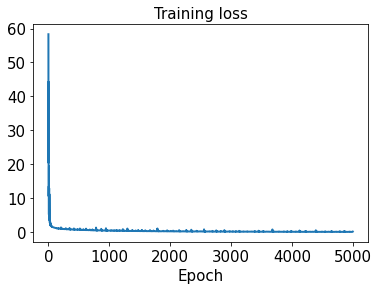

In [8]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

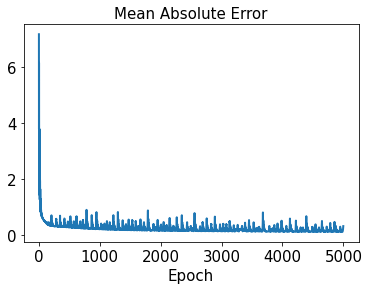

In [9]:
plt.plot(hist['mae'], lw=2)
plt.title('Mean Absolute Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [10]:
test_results = autoencoder.evaluate(x_test)

1/1 [==============================] - 0s 118ms/step - loss: 0.0600 - mae: 0.0000e+00 - mape: 0.0000e+00 - rmse: 0.0000e+00 - msle: 0.0000e+00


In [11]:
decoded_imgs = autoencoder.predict(x_test)

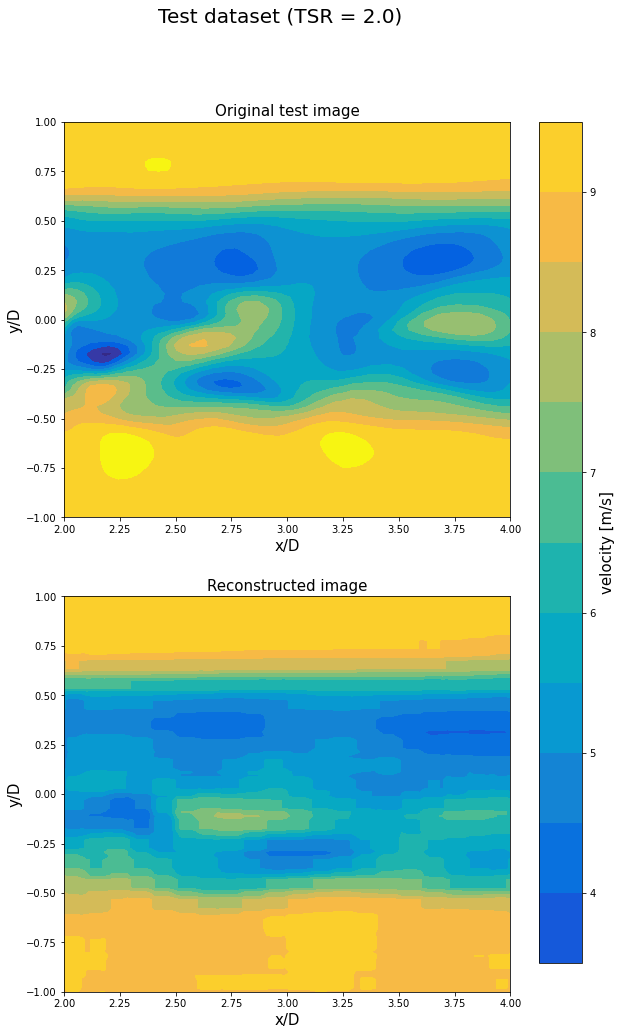

In [12]:
plt.figure(figsize=(8, 16))
xtest_rotate = x_test.T.reshape(100, 100)
decoded_rotate = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(2, 1, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, xtest_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(2, 1, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.075, 0.73])
cbar = plt.colorbar(a2, cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)
cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [13]:
error_test = np.abs(decoded_imgs - x_test) / x_test * 100
print(error_test)

[[[[10.206966 ]
   [ 5.0959373]
   [ 5.112906 ]
   ...
   [ 2.0931683]
   [ 2.0664096]
   [11.837767 ]]

  [[ 5.127585 ]
   [ 4.1765056]
   [ 4.196665 ]
   ...
   [ 2.6056213]
   [ 2.5790048]
   [ 2.8210824]]

  [[ 5.1375623]
   [ 4.190619 ]
   [ 4.209763 ]
   ...
   [ 2.6117609]
   [ 2.5851476]
   [ 2.8292575]]

  ...

  [[ 4.9231825]
   [ 4.152522 ]
   [ 4.103586 ]
   ...
   [ 1.2608663]
   [ 1.3091697]
   [ 2.687647 ]]

  [[ 4.938327 ]
   [ 4.168826 ]
   [ 4.1341805]
   ...
   [ 1.2072496]
   [ 1.2556155]
   [ 2.6358926]]

  [[12.739772 ]
   [ 4.821258 ]
   [ 4.775732 ]
   ...
   [ 1.8725628]
   [ 1.9289758]
   [ 9.616078 ]]]]


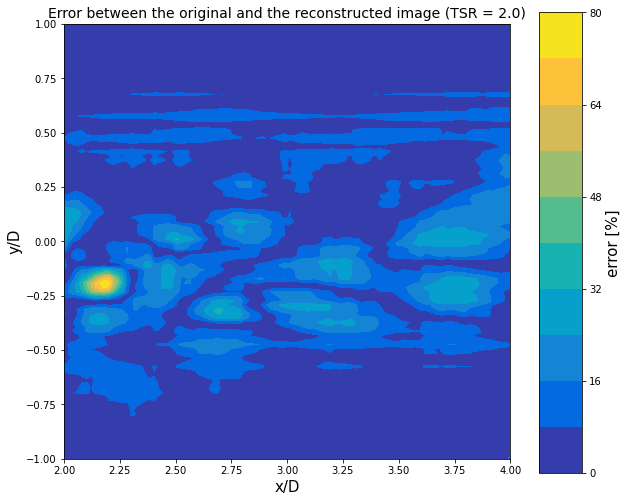

In [14]:
error_test_rotate = error_test.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 2.0)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

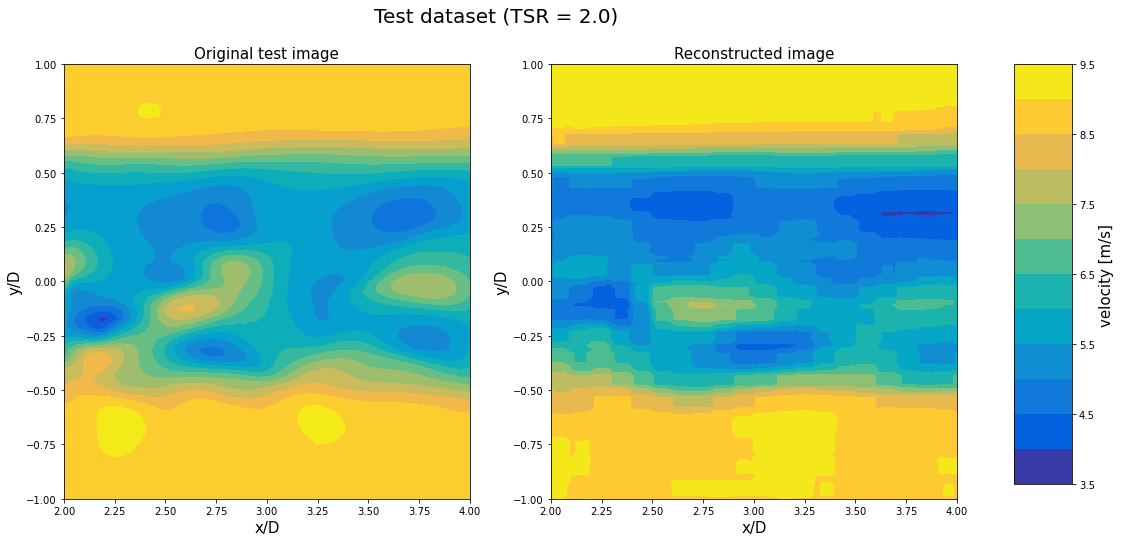

In [15]:
plt.figure(figsize=(16, 8))
xtest_rotate2 = x_test.T.reshape(100, 100)
decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, xtest_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [16]:
train0 = x_train[0].reshape(1, 100, 100, 1)
train_decode0 = autoencoder.predict(train0).reshape(100, 100)
print(train_decode0.shape)

(100, 100)


In [17]:
train0_orig = x_train[0].reshape(100, 100)

In [18]:
error_train0 = np.abs(train_decode0 - train0_orig) / train0_orig * 100

In [19]:
print(error_train0)

[[ 9.960178   4.8809266  4.8849525 ...  2.477206   2.5070462 12.176583 ]
 [ 4.664411   3.7700918  3.7619467 ...  3.094628   3.122232   3.138804 ]
 [ 4.596804   3.6845174  3.6753368 ...  3.0977004  3.1253026  3.1439095]
 ...
 [ 3.3585765  3.6309648  3.5096123 ...  2.5062575  2.5425467  3.7029777]
 [ 3.3104074  3.583929   3.473986  ...  2.5404708  2.5674193  3.7265115]
 [11.41704    4.0687437  3.9509733 ...  3.1771705  3.2131855 10.639774 ]]


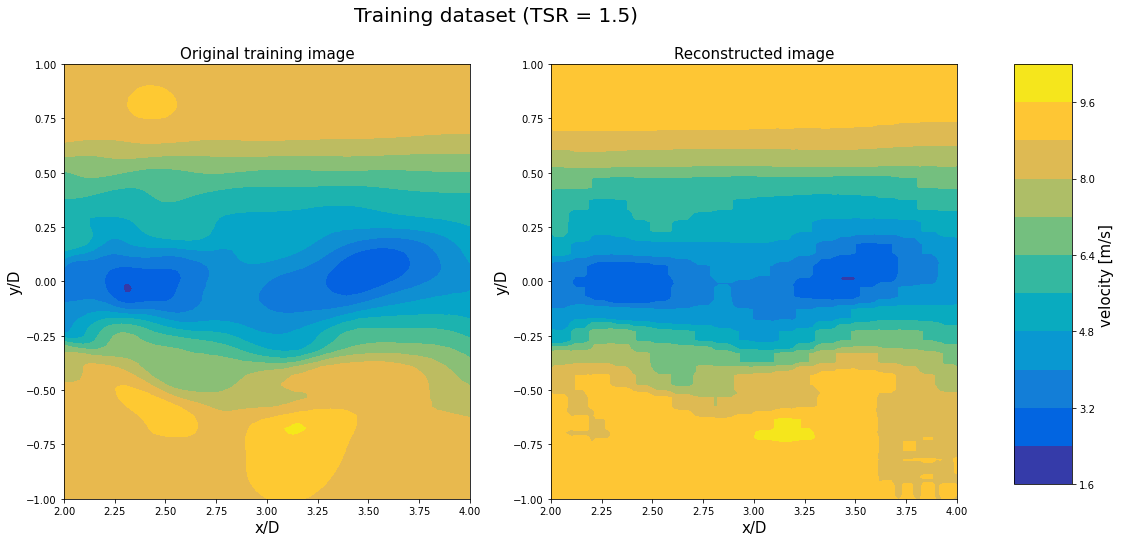

In [25]:
plt.figure(figsize=(16, 8))

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train0_orig, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original training image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train_decode0, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Training dataset (TSR = 1.5)',fontsize=20)
plt.show()

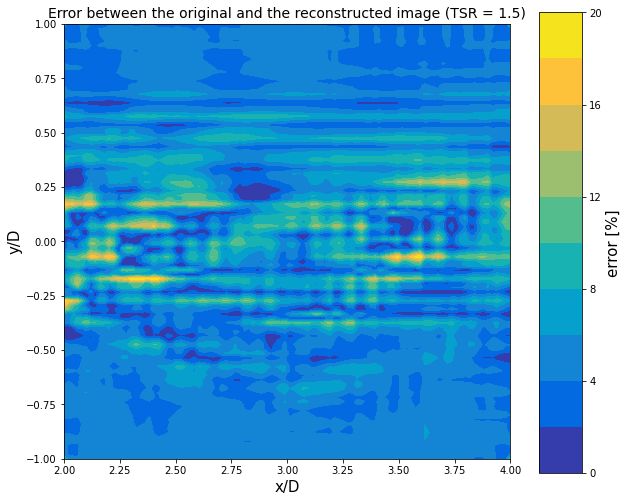

In [20]:
error_train0_rotate = error_train0.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train0_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.5)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

In [21]:
print(np.mean(error_train0))

5.094544


In [22]:
print(np.max(error_train0))

19.955961


In [23]:
print(np.mean(error_test))

7.842081


In [24]:
print(np.max(error_test))

78.764145
